# Equity Market Crisis Regime Prediction using Machine Learning GBDT

## Part VII: Compare GBDT Models: XGBoost and LightGBM

### Quick access to the whole series:

1. [Part I: Introduction](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt1)
1. [Part II: Data Preparation](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt2)
1. [Part III: Exploratory data analysis](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt3)
1. [Part IV: Feature Selection, Hyperparameter Tuning (LightGBM)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt4)
1. [Part V: Model Evaluation and Interpretation (LightGBM)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt5)
1. [Part VI: SVM and Neural Networks (MLP and 1D-CNN)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt6)
1. [Part VII: Compare GBDT Models: XGBoost and LightGBM](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt7)
1. [Part VIII: Deployment: end-to-end process (LightGBM)](https://www.kaggle.com/code/xxxxyyyy80008/equity-market-crisis-regime-prediction-using-gbdt8)

---



### Outline of this notebook

<a id="toc"></a>

- [1. Load data](#1)
    
    
- [2. LightGBM ](#2)
    - [2.1 Hyperparameter tuning](#2.1)
    - [2.2 Predict testing data](#2.2)
    - [2.3 Model performance](#2.3)
    - [2.4 Model Interpretation and Explanation with SHAP](#2.4)
    
    

- [3. XGBoost](#3)
    - [2.1 Hyperparameter tuning](#3.1)
    - [2.2 Predict testing data](#3.2)
    - [2.3 Model performance](#3.3)
    - [2.4 Model Interpretation and Explanation with SHAP](#3.4)
    


## Load and install packages

In [1]:
import pandas as pd
import numpy as np
import os
import gc
import copy
import json
from pathlib import Path
from datetime import datetime, timedelta, date
import time
from dateutil.relativedelta import relativedelta 


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import statsmodels.api as sm
import seaborn as sns


import pyarrow.parquet as pq
import pyarrow as pa

from tqdm import tqdm


from sklearn.metrics import roc_auc_score


In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

import pytorch_lightning as pl
random_seed=1
pl.seed_everything(random_seed)

1

<a id="1"></a>

# <left>1. Load data</left>

[back to top](#toc)

In [3]:
df = pd.read_parquet('../input/equity-market-crisis-regime-prediction-using-gbdt2/data.parquet')
df.set_index(keys=['x_date'], inplace=True)

In [4]:
target_cols = ['pct_chg15', 'regime_change', 'target']
feats = set(df.columns)-set(target_cols)

In [5]:
#final_feats = ['T1YFF_pct_chg60', 'LRUN64TTJPM156S_pct_chg250', 'AAA10Y_chg10', 'T10Y2Y_pct_chg10', 'STOXX50E_chg10', 'BAMLHE00EHYITRIV_pct_chg10', 'T10YFFM_pct_chg10', 'STLFSI3_chg10', 'VIX_chg10', 'JPY=X_pct_chg10', 'IRLTLT01JPM156N_ma_dist20_50', 'NASDAQ100_zscore60', 'KS11_pct_chg10', 'CL=F_pct_chg10', 'T1YFF_pct_chg10', 'CFNAIMA3_ma_dist20_50', 'BAAFFM_zscore60', 'T10Y2YM_zscore250', 'DJI_ma_dist20_50', 'NFCI_zscore60', 'WILLREITIND_zscore60', 'NIKKEI225_zscore60', 'TENEXPCHAREARISPRE_chg250', 'JTSOSL_zscore60', 'CPFF_pct_chg250', 'VIX_pct_chg60', 'COMPOUT_ma_dist20_50', 'STLFSI3_pct_chg10', 'IXIC_ma_dist20_50', 'WILLREITIND_chg10', 'KLSE_zscore60', 'VXDCLS_chg250', 'STLFSI3_zscore250', 'RUT_zscore60', 'LRUN64TTJPM156S_ma_dist20_50', 'UMCSENT_zscore60', 'TENEXPCHAREARISPRE_zscore60', 'GC=F_zscore60', 'JTSOSL_ma_dist20_50', 'RVXCLS_chg10', 'VIXCLS_zscore60', 'NFCIRISK_zscore60', 'T5YIE_pct_chg10', 'AAAFF_pct_chg10', 'T10YFF_pct_chg60', 'ANFCI_pct_chg10', 'ABCOMP_ma_dist20_50', 'IRLTLT01JPM156N_ma_dist200_50', 'VXNCLS_chg10', 'T1YFF_chg10', 'T10Y2Y_chg10', 'NFCIRISK_pct_chg60', 'MANMM101JPM189S_zscore60', 'STLPPMDEF_zscore60', 'CPFF_pct_chg60', 'STLPPM_ma_dist20_50', 'NFCICREDIT_pct_chg10', 'RBJPBIS_chg10', 'JTSOSL_zscore250', 'NFCICREDIT_chg10', 'IRSTCI01JPM156N_zscore60', 'KS11_pct_chg60', 'CFNAI_zscore60', 'T10YIEM_chg60', 'ANFCI_zscore60', 'MYAGM2JPM189S_ma_dist200_50', 'T10Y2YM_pct_chg250', 'KLSE_ma_dist20_50', 'CFNAIDIFF_ma_dist20_50', 'BAMLHYH0A3CMTRIV_pct_chg10', 'KS11_ma_dist20_50', 'BAMLCC0A1AAATRIV_zscore60', 'GC=F_pct_chg10', 'VXNCLS_zscore250', 'STLFSI3_pct_chg60', 'T10YIEM_pct_chg60', 'N100_zscore250', 'TYX_ma_dist200_50', 'NFCI_pct_chg10', 'NASDAQCOM_pct_chg10', 'PAYNSA_chg60', 'IRX_chg10', 'CFNAI_ma_dist20_50', 'CL=F_zscore60', 'BAAFFM_ma_dist200_50', 'T3MFF_zscore60', 'MICH_ma_dist20_50', 'STLFSI3_zscore60', 'GC=F_chg10', 'WILLREITIND_ma_dist20_50', 'NFCICREDIT_pct_chg60', 'KLSE_pct_chg10', 'PAYNSA_ma_dist20_50', 'RBJPBIS_zscore60', 'HSI_chg10', 'AAAFF_chg10', 'STLPPMDEF_chg250', 'FVX_pct_chg10', 'FTSE_chg10', 'N225_chg10', 'BAMLHYH0A0HYM2TRIV_chg10', 'JPNASSETS_zscore60', 'JPNCPIALLMINMEI_pct_chg10', 'CPFF_pct_chg10', 'VIX_zscore60', 'BAA10YM_zscore250', 'ABCOMP_zscore60', 'T10Y3M_pct_chg250', 'PAYEMS_zscore250', 'T10Y2YM_chg250', 'NFCILEVERAGE_chg10', 'NFCINONFINLEVERAGE_zscore60', 'HSI_zscore60', 'VXDCLS_pct_chg10', 'JPNCPIALLMINMEI_zscore60', 'DJI_pct_chg10', 'T3MFF_chg10', 'WILLLRGCAPGR_chg10', 'MYAGM2JPM189S_zscore60', 'FVX_ma_dist20_50', 'VXNCLS', 'NFCICREDIT', 'NFCIRISK_chg10', 'FTSE_zscore60']
#final_feats = ['BAAFFM_ma_dist200_50', 'HSI_chg20', 'PAYEMS_chg60', 'RBJPBIS_ma_dist20_50', 'WILLSMLCAP_chg20', 'BAMLHE00EHYITRIV_pct_chg5', 'WILLREITIND_pct_chg20', 'EXPINF1YR_chg5_above200dMA', 'GVZCLS_chg5', 'TENEXPCHAINFRISPRE_ma_dist20_50', 'AAA10Y_pct_chg5', 'N225_pct_chg20', 'RUT_chg10', 'BAAFFM_zscore250', 'BAMLHYH0A0HYM2TRIV_pct_chg10', 'OVXCLS_volat60', 'PAYNSA_std60', 'GC=F_pct_chg10', 'T10Y2Y_pct_chg120', 'KCFSI_chg20', 'CPFF_chg5', 'T10YIEM_chg60', 'CPFF_pct_chg10', 'HSI_chg5', 'FVX_pct_chg10', 'KS11_pct_chg5', 'NIKKEI225_std60_chg200', 'IRSTCI01JPM156N_chg20', 'DX-Y.NYB_zscore60', 'BAMLHYH0A3CMTRIV_chg10', 'WILLLRGCAPVAL_zscore60', 'N100_std60_chg200', 'TNX_chg20', 'T5YFF_chg10', 'GC=F_chg20', 'VXDCLS_pct_chg20', 'LFWA64TTJPM647S_chg60', 'ABCOMP_pct_chg5', 'HSI_zscore60', 'MYAGM2JPM189S_zscore120', 'USSLIND_pct_chg20', 'T10YFFM_zscore60', 'VXNCLS_chg5', 'STLFSI3_pct_chg60', 'NIKKEI225_zscore120', 'GC=F_chg10', 'STLPPM_chg5', 'VXDCLS_chg5', 'T10Y3M_pct_chg250', 'BAA10Y_zscore250', 'FTSE_chg120', 'NASDAQCOM_zscore60', 'NFCI_pct_chg10', 'ABCOMP_chg5', 'NFCICREDIT_pct_chg5', 'VIX_zscore60', 'VXNCLS_pct_chg10', 'NDX_std125', 'T3MFF_chg10', 'FVX_zscore200', 'WILLREITIND_chg20', 'T10YIEM_pct_chg60', 'FVX_pct_chg5', 'STLFSI3_chg5', 'HSI_chg10', 'NDX_pct_chg10', 'FTSE_chg20', 'WILLLRGCAPGR_chg10', 'CPFF_pct_chg20', 'REAINTRATREARAT1MO_ma_dist500_250', 'MYAGM2JPM189S_chg5', 'VIX_chg10', 'FTSE_pct_chg10', 'T10YFF_pct_chg20', 'NFCILEVERAGE_chg250', 'NFCI_chg5', 'T10Y2YM_chg250', 'FVX_ma_dist20_50', 'N100_chg10', 'T10Y2YM_std125_chg200', 'CFNAIDIFF_std60', 'DJI_zscore120', 'NFCICREDIT_std60', 'DJI_chg10', 'DJI_pct_chg20', 'FTSE_zscore60', 'WILLLRGCAPVAL_pct_chg10', 'N100_zscore200']
final_feats = ['NASDAQ100_std125_chg200', 'MICH_ma_dist20_50', 'STLPPM_ma_dist20_50', 'GC=F_chg5', 'STLFSI3_pct_chg5', 'VIXCLS_chg20', 'VIX_zscore250', 'IRLTLT01JPM156N_std125', 'LFWA64TTJPM647S_volat60', 'WILLLRGCAPVAL_std60_chg200', 'GC=F_pct_chg20_above200dMA', 'PAYNSA_zscore200', 'T1YFF_pct_chg20', 'NIKKEI225_zscore120', 'LRUN64TTJPM156S_std125_chg200', 'T1YFF_ma_dist200_50', 'WILLSMLCAP_chg20', 'HSI_chg5', 'JPNASSETS_zscore120', 'NIKKEI225_std60_chg200', 'HSI_chg20', 'N225_pct_chg20', 'FVX_chg5', 'NASDAQ100_pct_chg10', 'RBJPBIS_ma_dist20_50', 'KS11_pct_chg5', 'WILLSMLCAP_chg10', 'T10Y2Y_pct_chg120', 'JTSOSL_std60_chg200', 'BAMLHYH0A0HYM2TRIV_std125_chg200', 'IRLTLT01JPM156N_std60_chg200', 'TB3SMFFM_zscore200', 'NIKKEI225_pct_chg10', 'RBJPBIS_zscore60', 'WILLREITIND_ma_dist20_50', 'LRUN64TTJPM156S_pct_chg250', 'MICH_pct_chg5', 'TNX_mean_std120', 'BAMLHE00EHYITRIV_chg10', 'VXNCLS_mean_std120', 'MYAGM2JPM189S_std125', 'BAA10YM_zscore120', 'T10Y3M_chg250', 'MYAGM2JPM189S_chg20', 'EXPINF1YR_chg5_above200dMA', 'NFCICREDIT_pct_chg60', 'GC=F_pct_chg10', 'REAINTRATREARAT1YE_pct_chg120', 'NDX_chg120', 'GVZCLS_chg5', 'KCFSI_chg20', 'AAA10Y_pct_chg5', 'TENEXPCHAINFRISPRE_ma_dist20_50', 'T5YIEM_pct_chg20', 'BAMLHE00EHYITRIV_chg5', 'USSLIND_pct_chg120', 'FVX_pct_chg10', 'T10YIEM_chg60', 'WILLREITIND_pct_chg20', 'BAA10Y_pct_chg10', 'T10YFF_chg10', 'LFWA64TTJPM647S_chg60', 'OVXCLS_volat60', 'RUT_pct_chg10', 'VXNCLS_chg10', 'BAA10Y_zscore250', 'NDX_chg10', 'T10Y2YM_zscore250', 'JPNASSETS', 'CPFF_pct_chg10', 'WILLREITIND_chg20', 'TNX_chg20', 'IRSTCI01JPM156N_chg20', 'GC=F_zscore60', 'CPFF_pct_chg250', 'CPFF_chg5', 'BAMLHYH0A3CMTRIV_chg10', 'CPFF_pct_chg5', 'VXNCLS_chg5', 'GC=F_chg20', 'FVX_pct_chg5', 'T10Y2Y_pct_chg250', 'FTSE_chg10', 'N100_std60_chg200', 'HSI_zscore60', 'NFCIRISK_pct_chg60', 'STLFSI3_pct_chg60', 'VIX_pct_chg10', 'RVXCLS_chg10', 'NFCICREDIT_pct_chg5', 'STLPPM_chg5', 'T3MFF_zscore60', 'ABCOMP_chg5', 'T10Y3M_pct_chg250', 'ABCOMP_pct_chg5', 'USSLIND_pct_chg20', 'STLPPM_pct_chg5', 'T3MFF_chg10', 'FVX_zscore200', 'VXDCLS_chg5', 'VIX_zscore60', 'VIX_chg20', 'STOXX50E_pct_chg10', 'DJI_zscore120', 'STLFSI3_chg5', 'NFCICREDIT', 'T10YIEM_pct_chg60', 'NDX_zscore60', 'HSI_chg10', 'AAAFF_pct_chg5', 'FTSE_mean_std120', 'MYAGM2JPM189S_chg5', 'BAMLHE00EHYITRIV_pct_chg250', 'REAINTRATREARAT1MO_ma_dist500_250', 'CPFF_pct_chg20', 'VXDCLS_pct_chg10', 'BAMLHYH0A3CMTRIV_zscore120', 'NFCI_chg5', 'FTSE_chg20', 'FVX_ma_dist20_50', 'T10YFF_pct_chg20', 'NFCILEVERAGE_chg250', 'BAMLHYH0A0HYM2TRIV_pct_chg10', 'T10Y2YM_std125_chg200', 'CFNAIDIFF_std60', 'N100_zscore120', 'DJI_chg10']

print(len(final_feats))


127


In [6]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [7]:
df.replace([-np.inf, np.inf], np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [8]:
train_start, train_end =  '2002-01-01',  '2019-12-01'
test_sart, test_end = '2020-01-01', '2022-09-10'

In [9]:
train_df = df[(df.index>=train_start) & (df.index<=train_end)]
test_df = df[(df.index>=test_sart) & (df.index<=test_end)]

train_df.shape,  test_df.shape

((4510, 3779), (708, 3779))

<a id="2"></a>

# <left>2. LightGBM</left>

[back to top](#toc)

In [10]:
#https://www.kaggle.com/code/gogo827jz/jane-street-supervised-autoencoder-mlp/notebook?scriptVersionId=73762661
# weighted average as per Donate et al.'s formula
# https://doi.org/10.1016/j.neucom.2012.02.053
# [0.0625, 0.0625, 0.125, 0.25, 0.5] for 5 fold
def weighted_average(a):
    w = []
    n = len(a)
    for j in range(1, n + 1):
        j = 2 if j == 1 else j
        w.append(1 / (2**(n + 1 - j)))
    return np.average(a, weights = w)

In [11]:
kfold_list = []

for yr in [2011, 2013, 2015, 2017, 2019]:
    train_loc = (train_df.index<=f'{yr-2}-12-01') 
    test_loc = (train_df.index<=f'{yr}-12-01') & (train_df.index>f'{yr-1}-01-01')
    kfold_list.append([train_df.loc[train_loc, final_feats], train_df.loc[train_loc, 'target'],
                       train_df.loc[test_loc, final_feats], train_df.loc[test_loc, ['target']],
                      ]
                     )
    
for i, (a, b, c, d) in enumerate(kfold_list):
    print(i+1, a.shape, b.shape, c.shape, d.shape, a.index.min(), a.index.max(), c.index.min(), c.index.max())

1 (1994, 127) (1994,) (484, 127) (484, 1) 2002-01-02 00:00:00 2009-12-01 00:00:00 2010-01-04 00:00:00 2011-12-01 00:00:00
2 (2499, 127) (2499,) (481, 127) (481, 1) 2002-01-02 00:00:00 2011-12-01 00:00:00 2012-01-03 00:00:00 2013-11-29 00:00:00
3 (3000, 127) (3000,) (483, 127) (483, 1) 2002-01-02 00:00:00 2013-11-29 00:00:00 2014-01-02 00:00:00 2015-12-01 00:00:00
4 (3504, 127) (3504,) (484, 127) (484, 1) 2002-01-02 00:00:00 2015-12-01 00:00:00 2016-01-04 00:00:00 2017-12-01 00:00:00
5 (4009, 127) (4009,) (482, 127) (482, 1) 2002-01-02 00:00:00 2017-12-01 00:00:00 2018-01-02 00:00:00 2019-11-29 00:00:00




<a id="2.1"></a>

## <left>2.1 Hyperparameter tuning</left>

[back to top](#toc)

### hyperopt search space

In [12]:
from hyperopt import hp
import numpy as np

search_space = {     
                 'num_boost_round': hp.choice('num_boost_round',list(range(650, 1001, 10))),
                 'boosting':hp.choice('boosting', ['gbdt']),
                 'objective':hp.choice('objective', ['binary'] ),
                 'metric':hp.choice('metric', ['auc']),
                 'scale_pos_weight':hp.choice('scale_pos_weight', [20]),
                 'learning_rate':  hp.choice('learning_rate', np.round(np.arange(0.01, 0.76, 0.01),3)), 
                 'feature_fraction': hp.choice('feature_fraction', np.round(np.arange(0.4, 0.86, 0.1),3)), 
                 'max_depth': hp.choice('max_depth', range(1, 3, 1)), #int type
                 'min_data_in_leaf': hp.choice('min_data_in_leaf',range(10, 101, 5)), #int type
                 'lambda_l1':hp.choice('lambda_l1', np.round(np.arange(0.165, 2.005, 0.001),3)),#reg_alpha
                 'lambda_l2':hp.choice('lambda_l2', np.round(np.arange(0.165, 1.005, 0.001),3)),#reg_lambda
                 'max_bin':hp.choice('max_bin', range(100, 501, 1)),#'max_bin':hp.quniform('max_bin', 100, 500, 50),#int
                 #'min_data_in_bin':hp.choice('min_data_in_bin', range(3, 100, 1)),
                 'min_sum_hessian_in_leaf':hp.choice('min_sum_hessian_in_leaf', np.round(np.arange(0.1, 1.25, 0.01),3)), 
                 'min_gain_to_split':hp.choice('min_gain_to_split', np.round(np.arange(0.01, 0.5, 0.01),3)), 
                 'bagging_fraction':hp.choice('bagging_fraction', np.round(np.arange(0.425, 0.65, 0.01),3)), 
                 'bagging_freq':hp.choice('bagging_freq', range(1, 20, 1)), #must be non-zero to use bagging_fraction
                 'seed':hp.choice('seed', [1]), 
    
                  }
                  

In [13]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import json

def get_tree_preds(X_train, y_train, X_test, params,
                   num_round=2000, cust_eval=None):

    dtrain = lgb.Dataset(X_train, y_train)
    params['verbosity'] = -1
    i_model = lgb.train(params = params,
                        train_set = dtrain,
                        num_boost_round=num_round,
                        feval=cust_eval,
                        early_stopping_rounds=None)

    y_preds = i_model.predict(X_test, num_iteration=i_model.best_iteration)
    scores = i_model.feature_importance(importance_type='gain', iteration=i_model.best_iteration)
    df_scores = pd.DataFrame({'feature':list(X_train.columns), 'gain': list(scores)})

    return y_preds, df_scores, i_model




In [14]:
from sklearn.metrics import roc_auc_score

def score(params):
   
    num_boost_round = params['num_boost_round']
    #params['metric'] = 'auc'
    
    if params in all_params:
        return {'loss': 99999999, 'status': STATUS_OK}
    
    all_params.append(copy.deepcopy(params))
    
    del params['num_boost_round']
    
    
    i = len(all_params)
    pred_list = []
    
    for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
        y_preds, df_scores, i_model = get_tree_preds(X_train, y_train, X_test, params=params,
                                                       num_round=num_boost_round, 
                                                       cust_eval=None)
        df_pred = y_test.copy(deep=True)

        df_pred['pred'] = y_preds
        df_pred['slide'] = j+1
        pred_list.append(df_pred)
        
    df_pred_all = pd.concat(pred_list, axis=0)
    loss = roc_auc_score(df_pred_all['target'], df_pred_all['pred'])
    loss = -np.round(loss, 3)
    

    i = i + 1
    
    return {'loss': loss, 'status': STATUS_OK}



### hyperparameter tuning

In [15]:
from hyperopt import hp
from hyperopt import space_eval
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, anneal, rand
from functools import partial
def optimize(space, evals, cores, trials, optimizer=tpe.suggest, random_state=1234, n_startup_jobs=10):
    algo = partial(optimizer, n_startup_jobs=n_startup_jobs)
    best = fmin(score, space, algo=algo, max_evals=evals, trials = trials)
    best = space_eval(space, best)
    print(best)
    return best

In [16]:
iter_dict = {}
cores = 8
n_trials = 100
n_random_trials = 30
verbose = False
n_iters = 5
for iter_i in range(n_iters):
    print(datetime.now(), iter_i)
    trials = Trials()
    all_params = []   
    
    best_param = optimize(search_space,
                          evals = n_trials,
                          optimizer=tpe.suggest,
                          cores = cores,
                          trials = trials, random_state=1234, 
                          n_startup_jobs=n_random_trials)    
    
    params = copy.deepcopy(best_param)
    
    num_boost_round = params['num_boost_round']
    del params['num_boost_round']

    scores = []
    for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
        _, df_scores, _ = get_tree_preds(X_train, y_train, X_test, params=params,
                                                       num_round=num_boost_round, 
                                                       cust_eval=None)
        scores.append(df_scores)
        
    iter_dict[iter_i] = {'params': best_param, 
                         'scores': scores}



2022-10-08 17:59:49.179869 0
100%|██████████| 100/100 [06:21<00:00,  3.81s/trial, best loss: -0.938]
{'bagging_fraction': 0.645, 'bagging_freq': 15, 'boosting': 'gbdt', 'feature_fraction': 0.5, 'lambda_l1': 1.356, 'lambda_l2': 0.882, 'learning_rate': 0.13, 'max_bin': 279, 'max_depth': 1, 'metric': 'auc', 'min_data_in_leaf': 50, 'min_gain_to_split': 0.07, 'min_sum_hessian_in_leaf': 1.19, 'num_boost_round': 1000, 'objective': 'binary', 'scale_pos_weight': 20, 'seed': 1}
2022-10-08 18:06:15.454303 1
100%|██████████| 100/100 [06:55<00:00,  4.16s/trial, best loss: -0.946]
{'bagging_fraction': 0.435, 'bagging_freq': 15, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'lambda_l1': 1.636, 'lambda_l2': 0.527, 'learning_rate': 0.01, 'max_bin': 129, 'max_depth': 2, 'metric': 'auc', 'min_data_in_leaf': 70, 'min_gain_to_split': 0.48, 'min_sum_hessian_in_leaf': 1.15, 'num_boost_round': 890, 'objective': 'binary', 'scale_pos_weight': 20, 'seed': 1}
2022-10-08 18:13:17.257981 2
100%|██████████| 100/100 [



<a id="2.2"></a>

## <left>2.2 Predict testing data</left>

[back to top](#toc)

### Create Sliding window - fixed length of training data

In [17]:
kfold_list = []

for yr in [2020, 2022]:
    train_loc = (train_df.index<f'{yr-1}-12-01') & (train_df.index>=f'{yr-15}-12-01') 
    test_loc = (df.index>=f'{yr}-01-01') & (df.index<f'{yr+2}-01-01')
    kfold_list.append([train_df.loc[train_loc, final_feats], train_df.loc[train_loc, 'target'],
                       df.loc[test_loc, final_feats], df.loc[test_loc, ['target']],
                      ]
                     )
    
for i, (a, b, c, d) in enumerate(kfold_list):
    print(i+1, a.shape, b.shape, c.shape, d.shape, a.index.min(), a.index.max(), c.index.min(), c.index.max())

1 (3523, 127) (3523,) (505, 127) (505, 1) 2005-12-01 00:00:00 2019-11-29 00:00:00 2020-01-02 00:00:00 2021-12-31 00:00:00
2 (3020, 127) (3020,) (220, 127) (220, 1) 2007-12-03 00:00:00 2019-11-29 00:00:00 2022-01-03 00:00:00 2022-10-04 00:00:00


### Predict testing data with models trained on train data

In [18]:

score_dfs = []
preds_list = []
pred_cols = []
models_dict = {}
for iter_i, v in iter_dict.items():
    params = copy.deepcopy(v['params'])
    print(params)
    
    num_boost_round = params['num_boost_round']
    del params['num_boost_round']

    scores_i = []
    preds_list_i = []
    models_list_i = []
    for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
        y_preds, df_scores, i_model = get_tree_preds(X_train, y_train, X_test, params=params,
                                                       num_round=num_boost_round, 
                                                       cust_eval=None)
        df_pred_i = y_test.copy(deep=True)
        df_pred_i[f'pred{iter_i}'] = y_preds
        scores_i.append(df_scores)
        preds_list_i.append(df_pred_i)
        models_list_i.append(i_model)
    
    models_dict[iter_i] = models_list_i
        
    
    df_pred = pd.concat(preds_list_i, axis=0)
                 
    pred_cols.append(f'pred{iter_i}')
    preds_list.append(df_pred)

{'bagging_fraction': 0.645, 'bagging_freq': 15, 'boosting': 'gbdt', 'feature_fraction': 0.5, 'lambda_l1': 1.356, 'lambda_l2': 0.882, 'learning_rate': 0.13, 'max_bin': 279, 'max_depth': 1, 'metric': 'auc', 'min_data_in_leaf': 50, 'min_gain_to_split': 0.07, 'min_sum_hessian_in_leaf': 1.19, 'num_boost_round': 1000, 'objective': 'binary', 'scale_pos_weight': 20, 'seed': 1}
{'bagging_fraction': 0.435, 'bagging_freq': 15, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'lambda_l1': 1.636, 'lambda_l2': 0.527, 'learning_rate': 0.01, 'max_bin': 129, 'max_depth': 2, 'metric': 'auc', 'min_data_in_leaf': 70, 'min_gain_to_split': 0.48, 'min_sum_hessian_in_leaf': 1.15, 'num_boost_round': 890, 'objective': 'binary', 'scale_pos_weight': 20, 'seed': 1}
{'bagging_fraction': 0.475, 'bagging_freq': 16, 'boosting': 'gbdt', 'feature_fraction': 0.5, 'lambda_l1': 0.637, 'lambda_l2': 0.419, 'learning_rate': 0.01, 'max_bin': 417, 'max_depth': 2, 'metric': 'auc', 'min_data_in_leaf': 95, 'min_gain_to_split': 0.13, '

In [19]:
t = pd.concat(preds_list, axis=1)
df_pred = t.iloc[:, :1].copy(deep=True)
df_pred[pred_cols] = t[pred_cols]
df_pred.head(5)

target  pred0  pred1  pred2  pred3  pred4
x_date                                               
2020-01-02    0.00   0.00   0.00   0.00   0.00   0.00
2020-01-03    0.00   0.00   0.00   0.00   0.00   0.00
2020-01-06    0.00   0.01   0.00   0.00   0.00   0.02
2020-01-07    0.00   0.00   0.00   0.00   0.00   0.01
2020-01-08    0.00   0.03   0.00   0.00   0.00   0.06




<a id="2.3"></a>

## <left>2.3 Model performance</left>

[back to top](#toc)


<AxesSubplot:xlabel='x_date'>

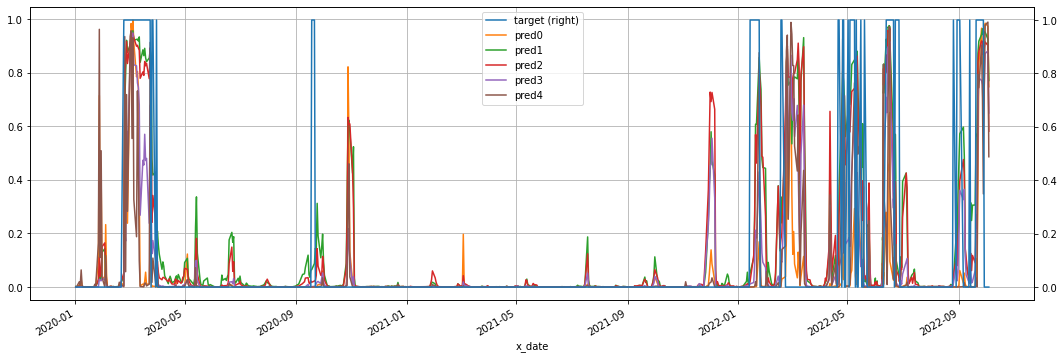

In [20]:
df_pred.plot(figsize=(18, 6), secondary_y=['target'], grid=True)

In [21]:
df_pred['pred_mean']=df_pred[pred_cols].mean(axis=1)
df_pred['pred_mean_label']=((df_pred[pred_cols]>0.5).mean(axis=1)>0.5).astype(int)


<AxesSubplot:xlabel='x_date'>

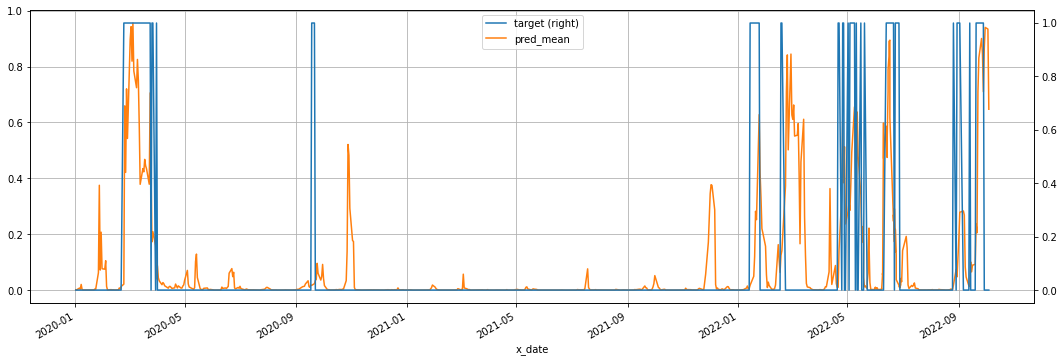

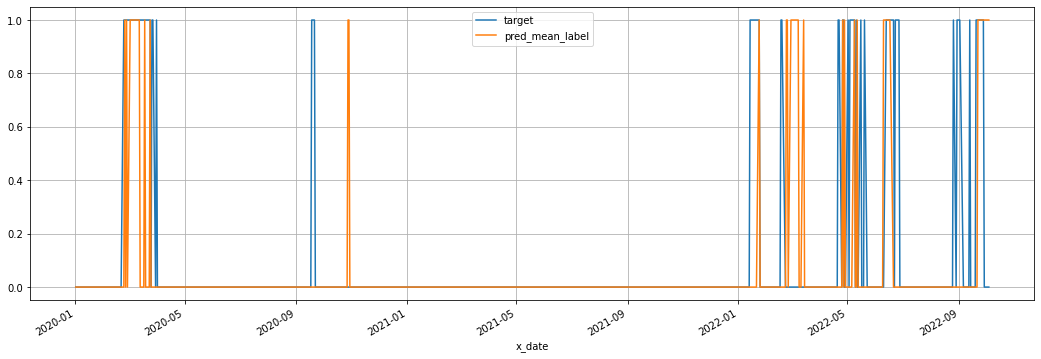

In [22]:
df_pred[['target', 'pred_mean',]].plot(figsize=(18, 6), secondary_y=['target'], grid=True)
df_pred[['target', 'pred_mean_label']].plot(figsize=(18, 6),  grid=True)

In [23]:
df_pred[df_pred.index>'2020-02-15'].head(20)

target  pred0  pred1  pred2  pred3  pred4  pred_mean  \
x_date                                                             
2020-02-18    0.00   0.00   0.00   0.00   0.00   0.00       0.00   
2020-02-19    0.00   0.01   0.00   0.00   0.00   0.02       0.01   
2020-02-20    0.00   0.00   0.00   0.00   0.00   0.01       0.00   
2020-02-21    0.00   0.02   0.02   0.02   0.00   0.01       0.01   
2020-02-24    1.00   0.00   0.04   0.05   0.01   0.00       0.02   
2020-02-25    1.00   0.69   0.69   0.78   0.21   0.94       0.66   
2020-02-26    1.00   0.24   0.80   0.84   0.17   0.06       0.42   
2020-02-27    1.00   0.46   0.92   0.92   0.58   0.72       0.72   
2020-02-28    1.00   0.24   0.88   0.83   0.48   0.28       0.54   
2020-03-02    1.00   0.88   0.90   0.91   0.85   0.94       0.90   
2020-03-03    1.00   0.98   0.94   0.94   0.90   0.96       0.94   
2020-03-04    1.00   0.96   0.90   0.88   0.80   0.55       0.82   
2020-03-05    1.00   1.00   0.96   0.95   0.95   0.93       0.96   
2020-03-06    1.00   0.91   0.92   0.93   0.83   0.33       0.78   
2020-03-09    1.00   0.78   0.92   0.90   0.83   0.19       0.72   
2020-03-10    1.00   0.80   0.93   0.90   0.76   0.73       0.83   
2020-03-11    1.00   0.75   0.92   0.89   0.75   0.45       0.75   
2020-03-12    1.00   0.34   0.93   0.88   0.68   0.10       0.59   
2020-03-13    1.00   0.00   0.84   0.78   0.27   0.00       0.38   
2020-03-16    1.00   0.01   0.89   0.80   0.47   0.00       0.43   

            pred_mean_label  
x_date                       
2020-02-18                0  
2020-02-19                0  
2020-02-20                0  
2020-02-21                0  
2020-02-24                0  
2020-02-25                1  
2020-02-26                0  
2020-02-27                1  
2020-02-28                0  
2020-03-02                1  
2020-03-03                1  
2020-03-04                1  
2020-03-05                1  
2020-03-06                1  
2020-03-09                1  
2020-03-10                1  
2020-03-11                1  
2020-03-12                1  
2020-03-13                0  
2020-03-16                0

In [24]:
for c in pred_cols + ['pred_mean']:
    auc_score = roc_auc_score(df_pred['target'], df_pred[c])
    print(c, f'{auc_score:.3f}')

pred0 0.871
pred1 0.937
pred2 0.931
pred3 0.925
pred4 0.853
pred_mean 0.928


In [25]:
prob_cut = 0.5
tp = ((df_pred['pred_mean']>prob_cut) & (df_pred['target']==1) ).sum() #true positive 
fp = ((df_pred['pred_mean']>prob_cut) & (df_pred['target']==0) ).sum() #false positive
fn = ((df_pred['pred_mean']<=prob_cut) & (df_pred['target']==1) ).sum() #false negative
tn = ((df_pred['pred_mean']<=prob_cut) & (df_pred['target']==0) ).sum() #true negative

cm = pd.DataFrame(data=[[tp, fp, ], [fn, tn,]], 
                  index=['Predict: Crisis', 'Predict: Normal'], 
                  columns=['Actual: Crisis', 'Actual: Normal', ],
                 )
precision = tp/(tp+fp) 
recall = tp/(tp + fn)
#cm

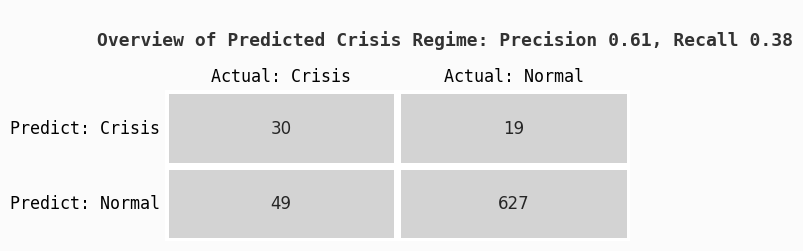

In [26]:
colors = ["lightgray", "lightgray","lightgray",]


background_color = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(6,2),  dpi=100,facecolor=background_color)


sns.heatmap(cm, cmap=colors,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax,
            yticklabels=cm.index,vmax=500,vmin=0,
            xticklabels=cm.columns,annot_kws={"fontsize":12})
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_facecolor(background_color) 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
#ax.tick_params(axis=u'both', which=u'both',length=0, )
ax.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
fig.text(.012, 1., f'''
Overview of Predicted Crisis Regime: Precision {precision:.2f}, Recall {recall:.2f}
''', fontfamily='monospace',fontweight='bold',fontsize=13,color='#323232', ha='left')


plt.show()




<a id="2.4"></a>

## <left>2.4 Model Interpretation and Explanation with SHAP</left>

[back to top](#toc)


In [27]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

2022-10-08 18:33:05.657333: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


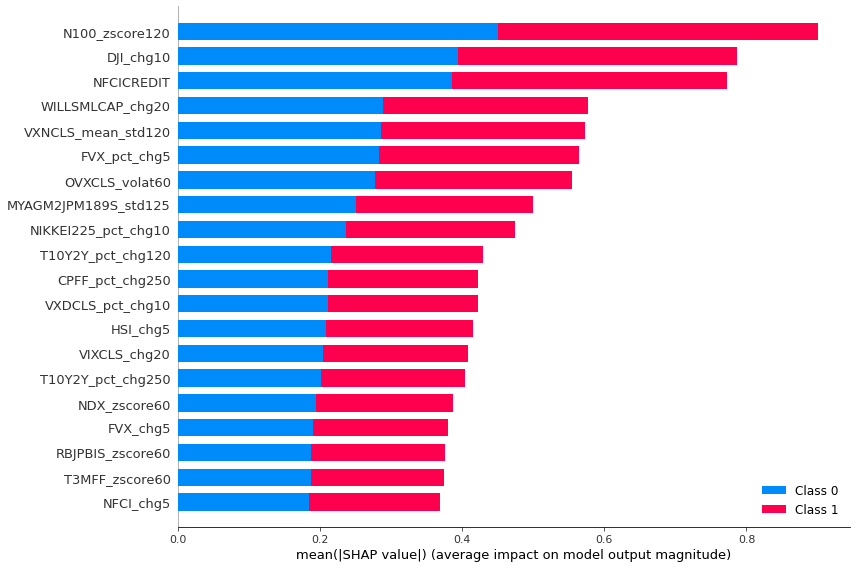

In [28]:
#only look at iter_i=3
X_test = kfold_list[0][-2]
for iter_i, v in models_dict.items():
    if iter_i != 3:
        continue
    tree_model = v[0]
    explainer = shap.TreeExplainer(tree_model, num_iteration=tree_model.best_iteration)
    # explainer = shap.TreeExplainer(tree_model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_size=(12, 8), )

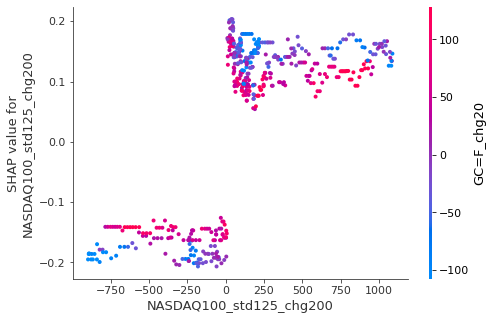

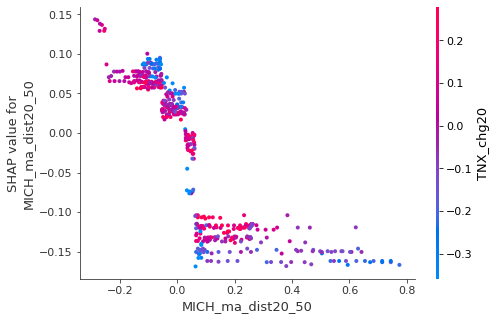

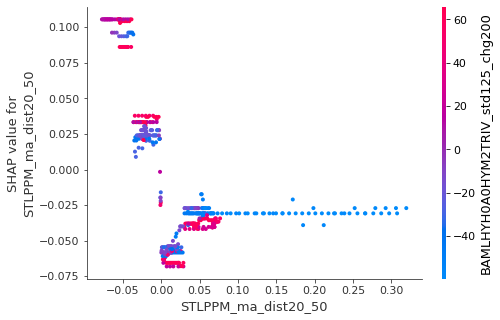

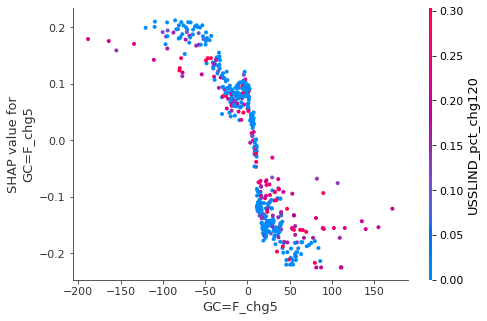

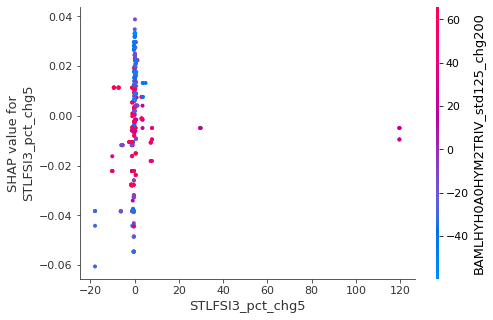

In [29]:
for iter_i, v in models_dict.items():
    if iter_i != 3:
        continue
    tree_model = v[0]
    explainer = shap.TreeExplainer(tree_model, num_iteration=tree_model.best_iteration)
    shap_values = explainer.shap_values(X_test)
    

    for name in X_test.columns[:5]:
        shap.dependence_plot(name, shap_values[1], X_test, )
        
    

In [30]:

expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")



Explainer expected value: -6.977958066327933


In [31]:
tp_sample = df_pred[(df_pred['target']==1) & (df_pred['pred_mean']>0.5)].index[0]
tn_sample = df_pred[(df_pred['target']==0) & (df_pred['pred_mean']<0.2)].index[0]
tp_sample, tn_sample

(Timestamp('2020-02-25 00:00:00'), Timestamp('2020-01-02 00:00:00'))

### True Positive Example: Model correctly predicted imminent crisis regime 

In [32]:
features = X_test.loc[X_test.index==tp_sample] #examine one date. this is a data frame
shap_values = explainer.shap_values(features)[1] #shap values for the row
shap_interaction_values = explainer.shap_interaction_values(features)
    
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

In [33]:
dis = [f'{a} ({b:.03f})' for a, b in zip(features.columns, features.values[0].round(3))]
shap_bar = pd.DataFrame(data={'feat': dis, 'shap': shap_values[0]})

In [34]:
x_ = shap_bar['shap']
shap_bar['shap_z'] = (x_ - x_.mean())/x_.std()
shap_bar['colors'] = ['red' if x_ > 0 else 'green' for x_ in shap_bar['shap_z']]
shap_bar = shap_bar[shap_bar['shap_z'].abs()>0.4]
shap_bar.sort_values('shap_z', inplace=True, ascending=False)
shap_bar.reset_index(inplace=True)


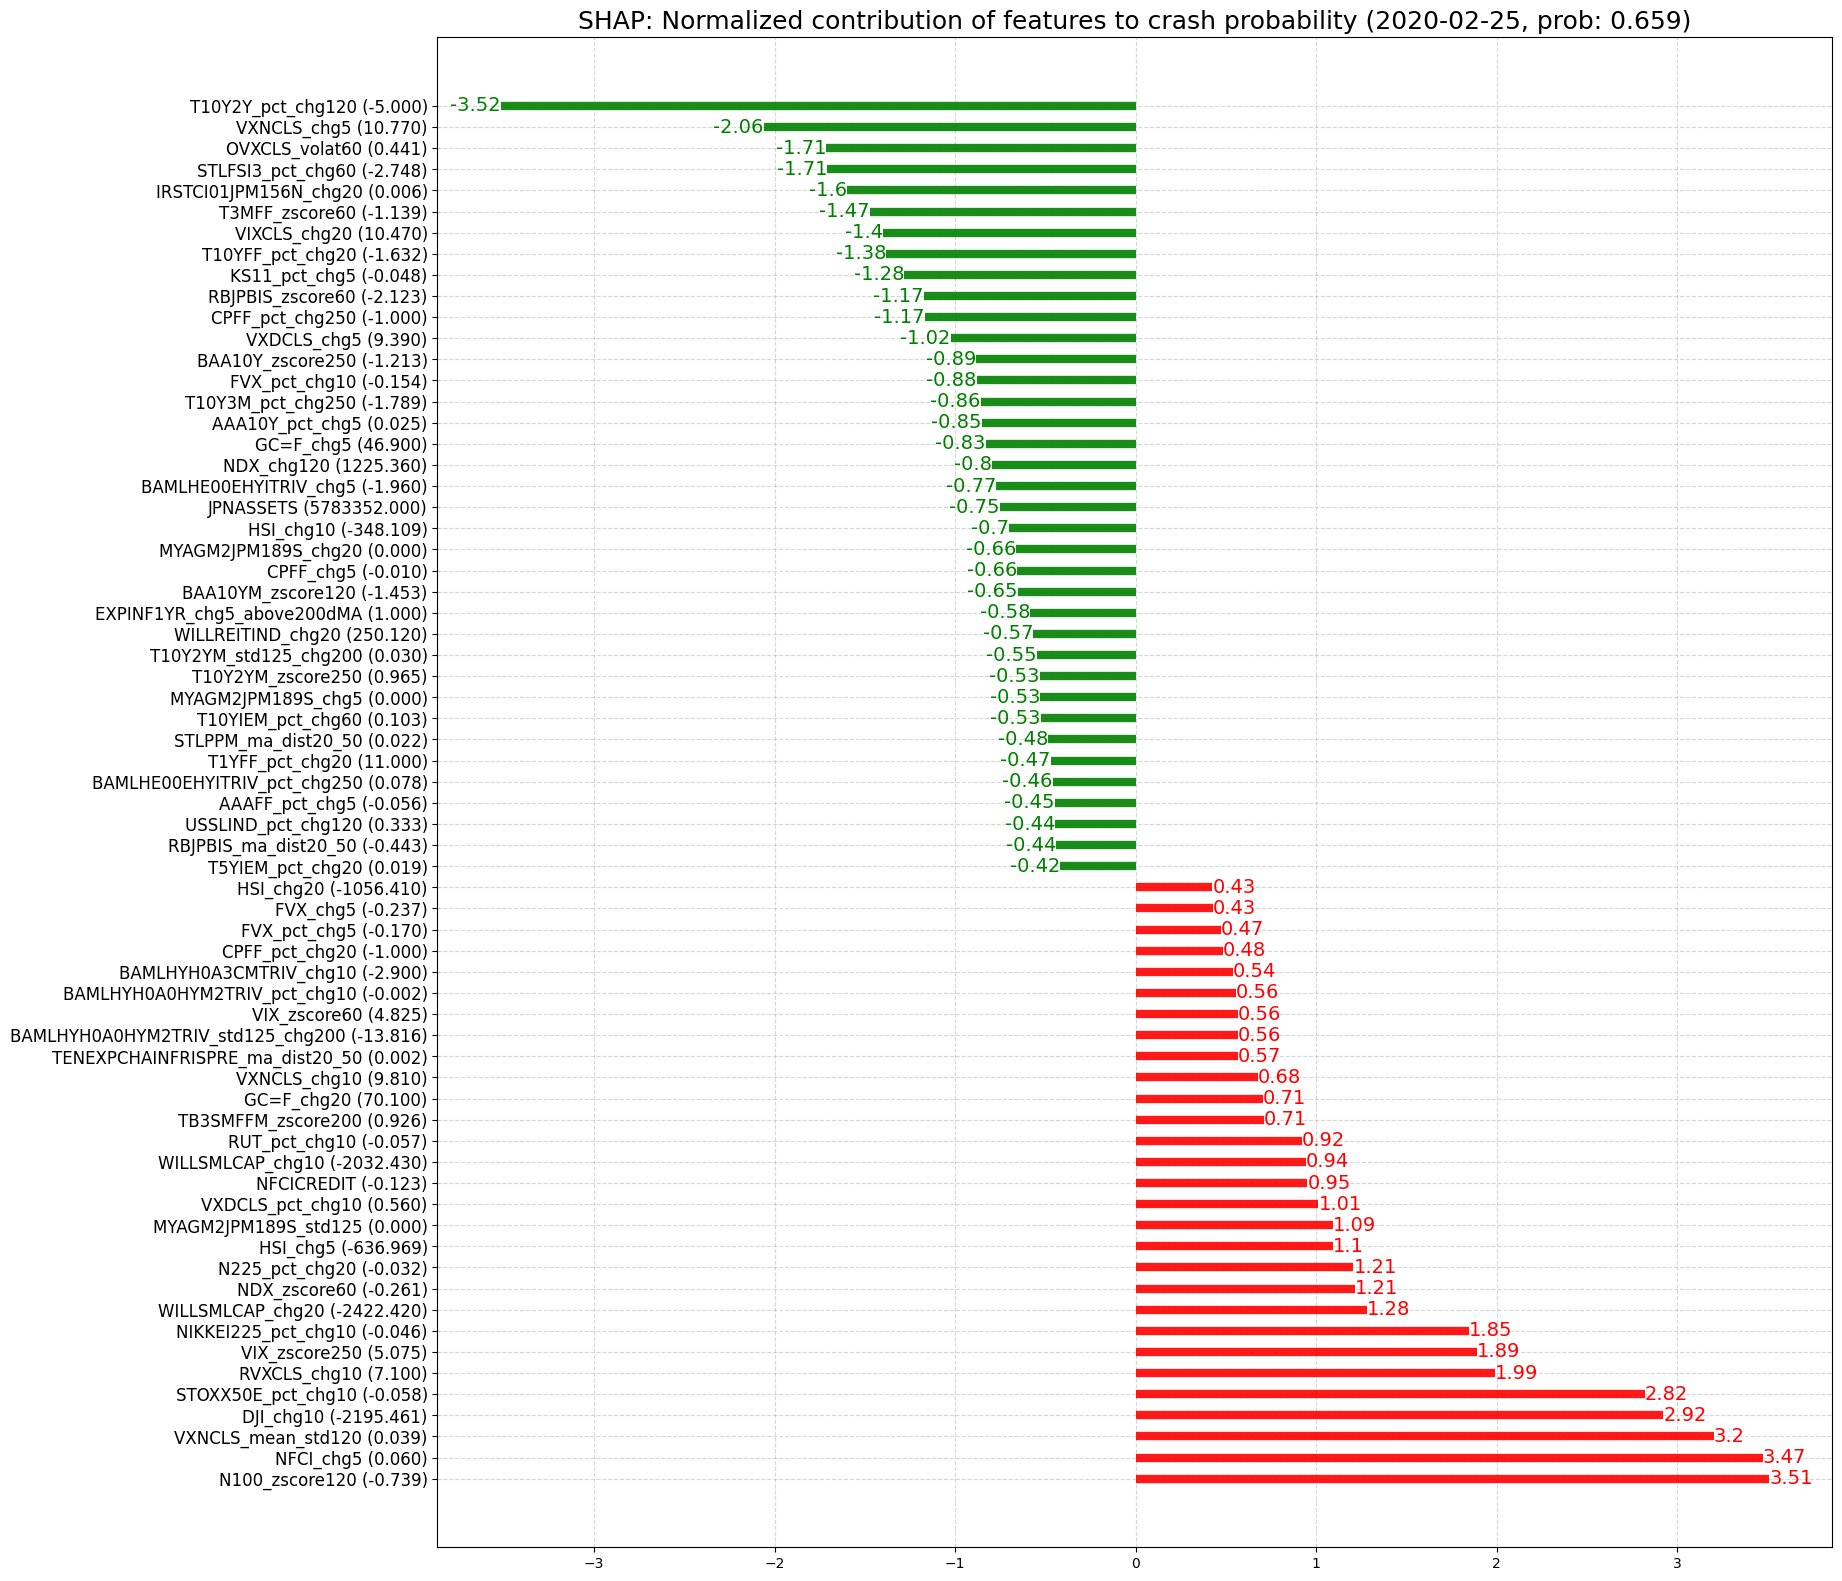

In [35]:
# Draw plot
plt.figure(figsize=(18,20), dpi= 100)
plt.hlines(y=shap_bar.index, xmin=0, xmax=shap_bar.shap_z, color=shap_bar.colors, alpha=0.9, linewidth=6)
for x, y, tex in zip(shap_bar.shap_z, shap_bar.index, shap_bar.shap_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x > 0 else 'green', 'size':14})

# Decorations
plt.yticks(shap_bar.index, shap_bar.feat, fontsize=12)
plt.title(f"SHAP: Normalized contribution of features to crash probability ({tp_sample.strftime('%Y-%m-%d')}, prob: {df_pred.loc[tp_sample]['pred_mean']:.03f})", 
          fontdict={'size':18})
plt.grid(linestyle='--', alpha=0.5)
# plt.xlim(-2.5, 2.5)
plt.show()


### True Negative Example: Model correctly predicted normal regime 

In [36]:
features = X_test.loc[X_test.index==tn_sample] #examine one date. this is a data frame
shap_values = explainer.shap_values(features)[1] #shap values for the row
shap_interaction_values = explainer.shap_interaction_values(features)
    
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

In [37]:
dis = [f'{a} ({b:.03f})' for a, b in zip(features.columns, features.values[0].round(3))]
shap_bar = pd.DataFrame(data={'feat': dis, 'shap': shap_values[0]})

In [38]:
x_ = shap_bar['shap']
shap_bar['shap_z'] = (x_ - x_.mean())/x_.std()
shap_bar['colors'] = ['red' if x_ > 0 else 'green' for x_ in shap_bar['shap_z']]
shap_bar = shap_bar[shap_bar['shap_z'].abs()>0.4]
shap_bar.sort_values('shap_z', inplace=True, ascending=False)
shap_bar.reset_index(inplace=True)


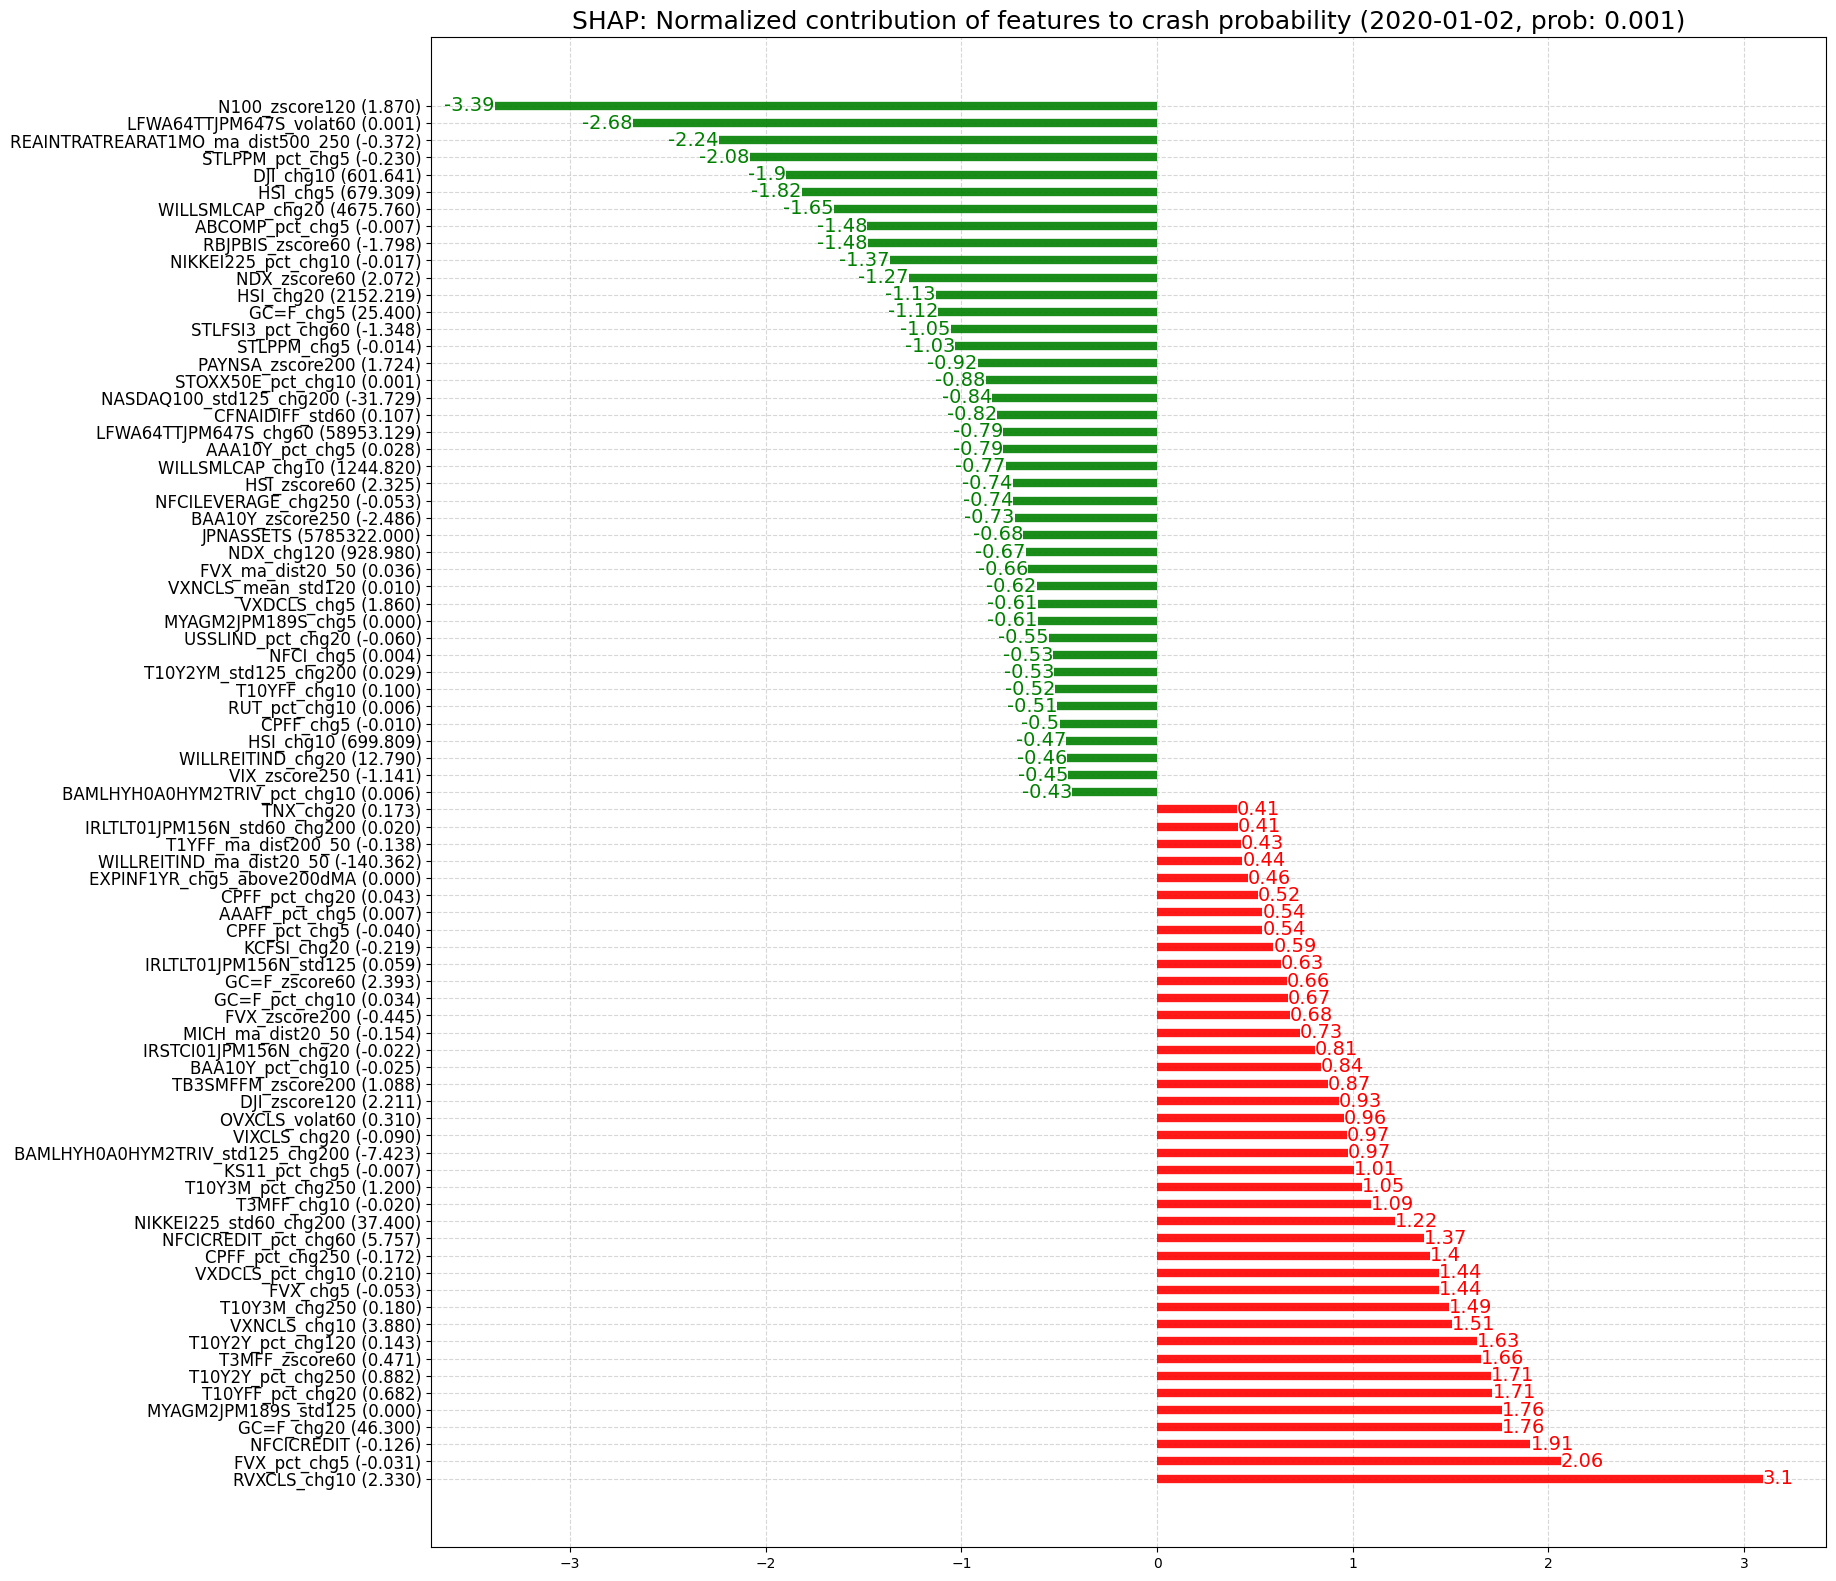

In [39]:
# Draw plot
plt.figure(figsize=(18,20), dpi= 100)
plt.hlines(y=shap_bar.index, xmin=0, xmax=shap_bar.shap_z, color=shap_bar.colors, alpha=0.9, linewidth=6)
for x, y, tex in zip(shap_bar.shap_z, shap_bar.index, shap_bar.shap_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x > 0 else 'green', 'size':14})

# Decorations
plt.yticks(shap_bar.index, shap_bar.feat, fontsize=12)
plt.title(f"SHAP: Normalized contribution of features to crash probability ({tn_sample.strftime('%Y-%m-%d')}, prob: {df_pred.loc[tn_sample]['pred_mean']:.03f})", 
          fontdict={'size':18})
plt.grid(linestyle='--', alpha=0.5)
# plt.xlim(-2.5, 2.5)
plt.show()


### Visualize trees from LightGBM models

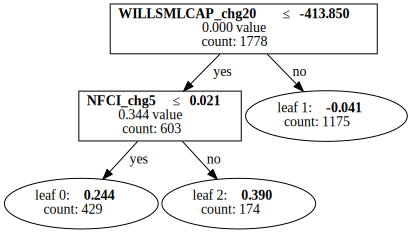

In [40]:
lgb.create_tree_digraph(tree_model, tree_index=1,  orientation = "vertical", show_info=['internal_count', 'leaf_count', 'internal_value'])

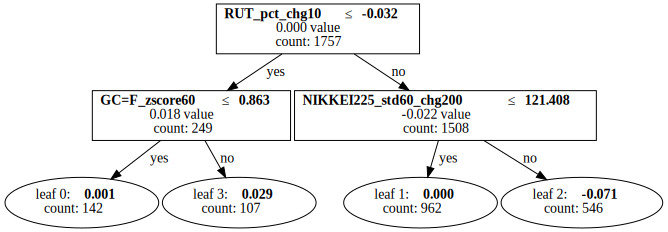

In [41]:
lgb.create_tree_digraph(tree_model, tree_index=100,  orientation = "vertical", show_info=['internal_count', 'leaf_count', 'internal_value'])

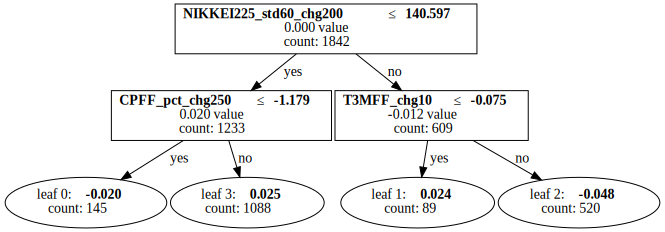

In [42]:
lgb.create_tree_digraph(tree_model, tree_index=200,  orientation = "vertical", show_info=['internal_count', 'leaf_count', 'internal_value'])

<a id="3"></a>

# <left>3. XGBoost</left>

[back to top](#toc)

In [43]:
kfold_list = []

for yr in [2011, 2013, 2015, 2017, 2019]:
    train_loc = (train_df.index<=f'{yr-2}-12-01') 
    test_loc = (train_df.index<=f'{yr}-12-01') & (train_df.index>f'{yr-1}-01-01')
    kfold_list.append([train_df.loc[train_loc, final_feats], train_df.loc[train_loc, 'target'],
                       train_df.loc[test_loc, final_feats], train_df.loc[test_loc, ['target']],
                      ]
                     )
    
for i, (a, b, c, d) in enumerate(kfold_list):
    print(i+1, a.shape, b.shape, c.shape, d.shape, a.index.min(), a.index.max(), c.index.min(), c.index.max())

1 (1994, 127) (1994,) (484, 127) (484, 1) 2002-01-02 00:00:00 2009-12-01 00:00:00 2010-01-04 00:00:00 2011-12-01 00:00:00
2 (2499, 127) (2499,) (481, 127) (481, 1) 2002-01-02 00:00:00 2011-12-01 00:00:00 2012-01-03 00:00:00 2013-11-29 00:00:00
3 (3000, 127) (3000,) (483, 127) (483, 1) 2002-01-02 00:00:00 2013-11-29 00:00:00 2014-01-02 00:00:00 2015-12-01 00:00:00
4 (3504, 127) (3504,) (484, 127) (484, 1) 2002-01-02 00:00:00 2015-12-01 00:00:00 2016-01-04 00:00:00 2017-12-01 00:00:00
5 (4009, 127) (4009,) (482, 127) (482, 1) 2002-01-02 00:00:00 2017-12-01 00:00:00 2018-01-02 00:00:00 2019-11-29 00:00:00




<a id="3.1"></a>

## <left>3.1 Hyperparameter tuning</left>

[back to top](#toc)

### hyperopt search space

In [44]:
#https://xgboost.readthedocs.io/en/stable/parameter.html

from hyperopt import hp
import numpy as np

search_space = {     
                 'num_boost_round': hp.choice('num_boost_round',list(range(650, 1001, 5))),
                 'booster':hp.choice('booster', ['gbtree']),
                 'objective':hp.choice('objective', ['binary:logistic'] ),
                 'eval_metric':hp.choice('eval_metric', ['aucpr']),#auc
                 'scale_pos_weight':hp.choice('scale_pos_weight', [20]),
                 'learning_rate':  hp.choice('learning_rate', np.round(np.arange(0.01, 0.76, 0.01),3)), 
                 'colsample_bytree': hp.choice('colsample_bytree', np.round(np.arange(0.25, 0.86, 0.1),3)), 
                 'max_depth': hp.choice('max_depth', range(1, 3, 1)), #int type
                 'alpha':hp.choice('alpha', np.round(np.arange(0.165, 2.005, 0.001),3)),#reg_alpha
                 'reg_lambda':hp.choice('reg_lambda', np.round(np.arange(0.165, 2.005, 0.001),3)),#reg_lambda
                 'max_bin':hp.choice('max_bin', range(100, 501, 1)),#'max_bin':hp.quniform('max_bin', 100, 500, 50),#int
                 'min_split_loss':hp.choice('min_split_loss', np.round(np.arange(0.01, 0.5, 0.01),3)), 
                 'subsample':hp.choice('subsample', np.round(np.arange(0.25, 0.85, 0.01),3)), 
                 'seed':hp.choice('seed', [1]), 
    
                  }
                  

In [45]:
import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import json

def get_xgb_preds(X_train, y_train, X_test, params,
                   num_round=2000, cust_eval=None):

    dtrain = xgb.DMatrix(data = X_train, label=y_train)
    params['verbosity'] = 0
    i_model = xgb.train(params = params,
                        dtrain = dtrain,
                        num_boost_round=num_round,
                        verbose_eval=False, 
                        feval=cust_eval,
                       )
    
    dtest = xgb.DMatrix(data = X_test)
    y_preds = i_model.predict(dtest)
    scores = i_model.get_score(importance_type='weight')
    df_scores = pd.DataFrame({'feature':scores.keys(), 'gain': scores.values()})

    return y_preds, df_scores, i_model




In [46]:
from sklearn.metrics import roc_auc_score

def score(params):
   
    num_boost_round = params['num_boost_round']
    #params['metric'] = 'auc'
    
    if params in all_params:
        return {'loss': 99999999, 'status': STATUS_OK}
    
    all_params.append(copy.deepcopy(params))
    
    del params['num_boost_round']
    
    
    i = len(all_params)
    pred_list = []
    
    for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
        y_preds, df_scores, i_model = get_xgb_preds(X_train, y_train, X_test, params=params,
                                                       num_round=num_boost_round, 
                                                       cust_eval=None)
        df_pred = y_test.copy(deep=True)

        df_pred['pred'] = y_preds
        df_pred['slide'] = j+1
        pred_list.append(df_pred)
        
    df_pred_all = pd.concat(pred_list, axis=0)
    loss = roc_auc_score(df_pred_all['target'], df_pred_all['pred'])
    loss = -np.round(loss, 3)
    

    i = i + 1
    
    return {'loss': loss, 'status': STATUS_OK}



### hyperparameter tuning

In [47]:
from hyperopt import hp
from hyperopt import space_eval
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, anneal, rand
from functools import partial
def optimize(space, evals, cores, trials, optimizer=tpe.suggest, random_state=1234, n_startup_jobs=10):
    algo = partial(optimizer, n_startup_jobs=n_startup_jobs)
    best = fmin(score, space, algo=algo, max_evals=evals, trials = trials)
    best = space_eval(space, best)
    print(best)
    return best

In [48]:
iter_dict = {}
cores = 8
n_trials = 30
n_random_trials = 10
verbose = False
n_iters = 5
for iter_i in range(n_iters):
    print(datetime.now(), iter_i)
    trials = Trials()
    all_params = []   
    
    best_param = optimize(search_space,
                          evals = n_trials,
                          optimizer=tpe.suggest,
                          cores = cores,
                          trials = trials, random_state=1234, 
                          n_startup_jobs=n_random_trials)    
    
    params = copy.deepcopy(best_param)
    
    num_boost_round = params['num_boost_round']
    del params['num_boost_round']

    scores = []
    for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
        _, df_scores, _ = get_xgb_preds(X_train, y_train, X_test, params=params,
                                                       num_round=num_boost_round, 
                                                       cust_eval=None)
        scores.append(df_scores)
        
    iter_dict[iter_i] = {'params': best_param, 
                         'scores': scores}



2022-10-08 18:33:19.034031 0
100%|██████████| 30/30 [16:18<00:00, 32.60s/trial, best loss: -0.94]
{'alpha': 1.44, 'booster': 'gbtree', 'colsample_bytree': 0.45, 'eval_metric': 'aucpr', 'learning_rate': 0.35, 'max_bin': 138, 'max_depth': 2, 'min_split_loss': 0.05, 'num_boost_round': 975, 'objective': 'binary:logistic', 'reg_lambda': 0.987, 'scale_pos_weight': 20, 'seed': 1, 'subsample': 0.69}
2022-10-08 18:50:15.148463 1
100%|██████████| 30/30 [18:07<00:00, 36.23s/trial, best loss: -0.944]
{'alpha': 1.921, 'booster': 'gbtree', 'colsample_bytree': 0.85, 'eval_metric': 'aucpr', 'learning_rate': 0.04, 'max_bin': 455, 'max_depth': 2, 'min_split_loss': 0.44, 'num_boost_round': 850, 'objective': 'binary:logistic', 'reg_lambda': 1.754, 'scale_pos_weight': 20, 'seed': 1, 'subsample': 0.62}
2022-10-08 19:09:14.161702 2
100%|██████████| 30/30 [16:17<00:00, 32.58s/trial, best loss: -0.937]
{'alpha': 1.114, 'booster': 'gbtree', 'colsample_bytree': 0.65, 'eval_metric': 'aucpr', 'learning_rate': 0.04



<a id="3.2"></a>

## <left>3.2 Predict testing data</left>

[back to top](#toc)

### Create Sliding window - fixed length of training data

In [49]:
kfold_list = []

for yr in [2020, 2022]:
    train_loc = (train_df.index<f'{yr-1}-12-01') & (train_df.index>=f'{yr-15}-12-01') 
    test_loc = (df.index>=f'{yr}-01-01') & (df.index<f'{yr+2}-01-01')
    kfold_list.append([train_df.loc[train_loc, final_feats], train_df.loc[train_loc, 'target'],
                       df.loc[test_loc, final_feats], df.loc[test_loc, ['target']],
                      ]
                     )
    
for i, (a, b, c, d) in enumerate(kfold_list):
    print(i+1, a.shape, b.shape, c.shape, d.shape, a.index.min(), a.index.max(), c.index.min(), c.index.max())

1 (3523, 127) (3523,) (505, 127) (505, 1) 2005-12-01 00:00:00 2019-11-29 00:00:00 2020-01-02 00:00:00 2021-12-31 00:00:00
2 (3020, 127) (3020,) (220, 127) (220, 1) 2007-12-03 00:00:00 2019-11-29 00:00:00 2022-01-03 00:00:00 2022-10-04 00:00:00


### Predict testing data with models trained on train data

In [50]:

score_dfs = []
preds_list = []
pred_cols = []
models_dict = {}
for iter_i, v in iter_dict.items():
    params = copy.deepcopy(v['params'])
    print(params)
    
    num_boost_round = params['num_boost_round']
    del params['num_boost_round']

    scores_i = []
    preds_list_i = []
    models_list_i = []
    for j, (X_train, y_train, X_test, y_test) in enumerate(kfold_list):
        y_preds, df_scores, i_model = get_xgb_preds(X_train, y_train, X_test, params=params,
                                                       num_round=num_boost_round, 
                                                       cust_eval=None)
        df_pred_i = y_test.copy(deep=True)
        df_pred_i[f'pred{iter_i}'] = y_preds
        scores_i.append(df_scores)
        preds_list_i.append(df_pred_i)
        models_list_i.append(i_model)
    
    models_dict[iter_i] = models_list_i
        
    
    df_pred = pd.concat(preds_list_i, axis=0)
                 
    pred_cols.append(f'pred{iter_i}')
    preds_list.append(df_pred)

{'alpha': 1.44, 'booster': 'gbtree', 'colsample_bytree': 0.45, 'eval_metric': 'aucpr', 'learning_rate': 0.35, 'max_bin': 138, 'max_depth': 2, 'min_split_loss': 0.05, 'num_boost_round': 975, 'objective': 'binary:logistic', 'reg_lambda': 0.987, 'scale_pos_weight': 20, 'seed': 1, 'subsample': 0.69}
{'alpha': 1.921, 'booster': 'gbtree', 'colsample_bytree': 0.85, 'eval_metric': 'aucpr', 'learning_rate': 0.04, 'max_bin': 455, 'max_depth': 2, 'min_split_loss': 0.44, 'num_boost_round': 850, 'objective': 'binary:logistic', 'reg_lambda': 1.754, 'scale_pos_weight': 20, 'seed': 1, 'subsample': 0.62}
{'alpha': 1.114, 'booster': 'gbtree', 'colsample_bytree': 0.65, 'eval_metric': 'aucpr', 'learning_rate': 0.04, 'max_bin': 476, 'max_depth': 2, 'min_split_loss': 0.17, 'num_boost_round': 835, 'objective': 'binary:logistic', 'reg_lambda': 1.306, 'scale_pos_weight': 20, 'seed': 1, 'subsample': 0.63}
{'alpha': 1.781, 'booster': 'gbtree', 'colsample_bytree': 0.65, 'eval_metric': 'aucpr', 'learning_rate': 0.

In [51]:
t = pd.concat(preds_list, axis=1)
df_pred = t.iloc[:, :1].copy(deep=True)
df_pred[pred_cols] = t[pred_cols]
df_pred.head(5)

target  pred0  pred1  pred2  pred3  pred4
x_date                                               
2020-01-02    0.00   0.00   0.00   0.00   0.00   0.00
2020-01-03    0.00   0.00   0.00   0.00   0.00   0.00
2020-01-06    0.00   0.00   0.00   0.00   0.00   0.00
2020-01-07    0.00   0.00   0.00   0.00   0.00   0.00
2020-01-08    0.00   0.00   0.00   0.00   0.01   0.00




<a id="3.3"></a>

## <left>3.3 Model performance</left>

[back to top](#toc)


<AxesSubplot:xlabel='x_date'>

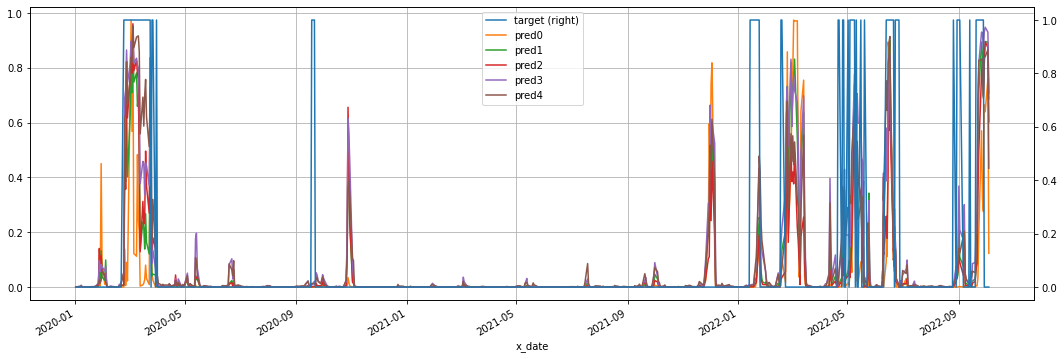

In [52]:
df_pred.plot(figsize=(18, 6), secondary_y=['target'], grid=True)

In [53]:
df_pred['pred_mean']=df_pred[pred_cols].mean(axis=1)
df_pred['pred_mean_label']=((df_pred[pred_cols]>0.5).mean(axis=1)>0.5).astype(int)


<AxesSubplot:xlabel='x_date'>

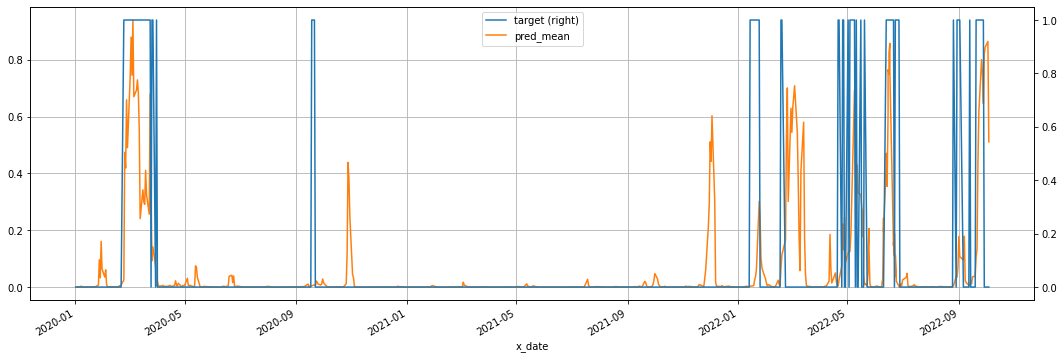

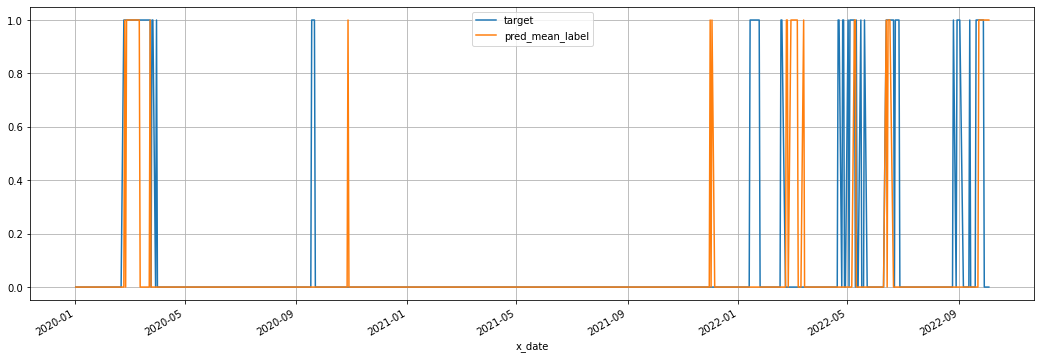

In [54]:
df_pred[['target', 'pred_mean',]].plot(figsize=(18, 6), secondary_y=['target'], grid=True)
df_pred[['target', 'pred_mean_label']].plot(figsize=(18, 6),  grid=True)

In [55]:
df_pred[df_pred.index>'2020-02-15'].head(20)

target  pred0  pred1  pred2  pred3  pred4  pred_mean  \
x_date                                                             
2020-02-18    0.00   0.00   0.00   0.00   0.00   0.00       0.00   
2020-02-19    0.00   0.00   0.00   0.01   0.01   0.00       0.00   
2020-02-20    0.00   0.00   0.00   0.00   0.01   0.01       0.00   
2020-02-21    0.00   0.00   0.00   0.01   0.02   0.01       0.01   
2020-02-24    1.00   0.00   0.01   0.01   0.05   0.05       0.02   
2020-02-25    1.00   0.14   0.41   0.51   0.69   0.62       0.47   
2020-02-26    1.00   0.01   0.38   0.36   0.72   0.63       0.42   
2020-02-27    1.00   0.09   0.69   0.82   0.87   0.82       0.66   
2020-02-28    1.00   0.02   0.40   0.62   0.75   0.66       0.49   
2020-03-02    1.00   0.74   0.63   0.77   0.81   0.76       0.74   
2020-03-03    1.00   0.97   0.82   0.87   0.90   0.84       0.88   
2020-03-04    1.00   0.57   0.71   0.78   0.85   0.82       0.75   
2020-03-05    1.00   0.91   0.93   0.96   0.94   0.95       0.94   
2020-03-06    1.00   0.12   0.75   0.79   0.82   0.87       0.67   
2020-03-09    1.00   0.11   0.78   0.83   0.84   0.91       0.69   
2020-03-10    1.00   0.48   0.66   0.78   0.81   0.91       0.73   
2020-03-11    1.00   0.24   0.70   0.76   0.80   0.92       0.68   
2020-03-12    1.00   0.20   0.53   0.46   0.70   0.86       0.55   
2020-03-13    1.00   0.00   0.14   0.13   0.38   0.56       0.24   
2020-03-16    1.00   0.01   0.24   0.31   0.46   0.69       0.34   

            pred_mean_label  
x_date                       
2020-02-18                0  
2020-02-19                0  
2020-02-20                0  
2020-02-21                0  
2020-02-24                0  
2020-02-25                1  
2020-02-26                0  
2020-02-27                1  
2020-02-28                1  
2020-03-02                1  
2020-03-03                1  
2020-03-04                1  
2020-03-05                1  
2020-03-06                1  
2020-03-09                1  
2020-03-10                1  
2020-03-11                1  
2020-03-12                1  
2020-03-13                0  
2020-03-16                0

In [56]:
for c in pred_cols + ['pred_mean']:
    auc_score = roc_auc_score(df_pred['target'], df_pred[c])
    print(c, f'{auc_score:.3f}')

pred0 0.878
pred1 0.909
pred2 0.913
pred3 0.918
pred4 0.927
pred_mean 0.919


In [57]:
prob_cut = 0.5
tp = ((df_pred['pred_mean']>prob_cut) & (df_pred['target']==1) ).sum() #true positive 
fp = ((df_pred['pred_mean']>prob_cut) & (df_pred['target']==0) ).sum() #false positive
fn = ((df_pred['pred_mean']<=prob_cut) & (df_pred['target']==1) ).sum() #false negative
tn = ((df_pred['pred_mean']<=prob_cut) & (df_pred['target']==0) ).sum() #true negative

cm = pd.DataFrame(data=[[tp, fp, ], [fn, tn,]], 
                  index=['Predict: Crisis', 'Predict: Normal'], 
                  columns=['Actual: Crisis', 'Actual: Normal', ],
                 )
precision = tp/(tp+fp) 
recall = tp/(tp + fn)
#cm

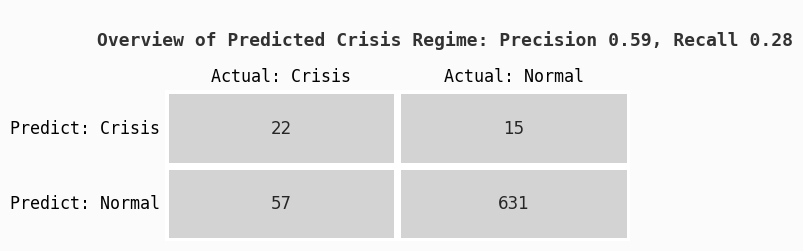

In [58]:
colors = ["lightgray", "lightgray","lightgray",]


background_color = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(6,2),  dpi=100,facecolor=background_color)


sns.heatmap(cm, cmap=colors,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax,
            yticklabels=cm.index,vmax=500,vmin=0,
            xticklabels=cm.columns,annot_kws={"fontsize":12})
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_facecolor(background_color) 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontfamily='monospace', fontsize=10)#
#ax.tick_params(axis=u'both', which=u'both',length=0, )
ax.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
fig.text(.012, 1., f'''
Overview of Predicted Crisis Regime: Precision {precision:.2f}, Recall {recall:.2f}
''', fontfamily='monospace',fontweight='bold',fontsize=13,color='#323232', ha='left')


plt.show()




<a id="3.4"></a>

## <left>3.4 Model Interpretation and Explanation with SHAP</left>

[back to top](#toc)

reference:

https://github.com/slundberg/shap/blob/master/notebooks/tabular_examples/tree_based_models/NHANES%20I%20Survival%20Model.ipynb


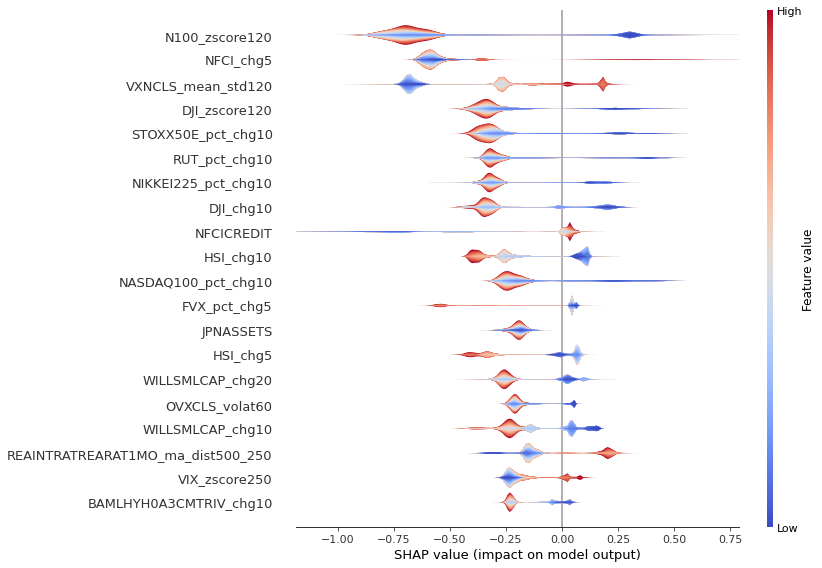

In [59]:
#only look at iter_i=3
X_test = kfold_list[0][-2]
for iter_i, v in models_dict.items():
    if iter_i != 3:
        continue
    tree_model = v[0]
    explainer = shap.TreeExplainer(tree_model, num_iteration=tree_model.best_iteration)
    # explainer = shap.TreeExplainer(tree_model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_size=(12, 8), plot_type="layered_violin", color='coolwarm')

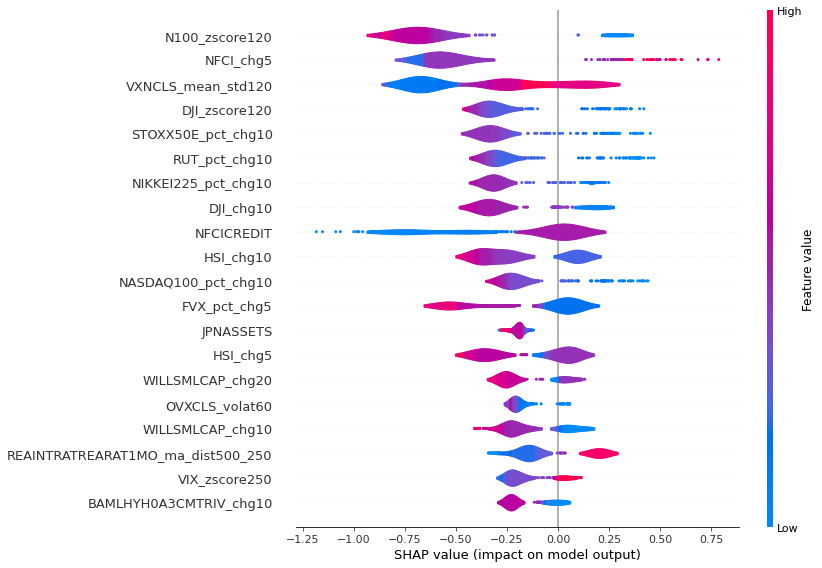

In [60]:
shap.summary_plot(shap_values, X_test, plot_size=(12, 8),  plot_type="violin")

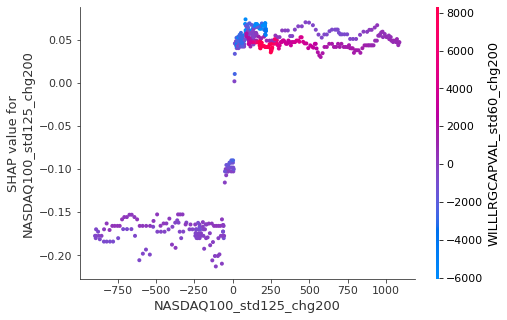

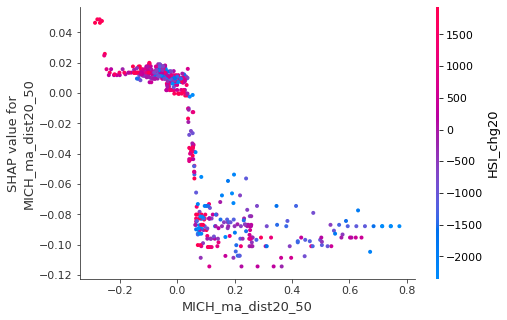

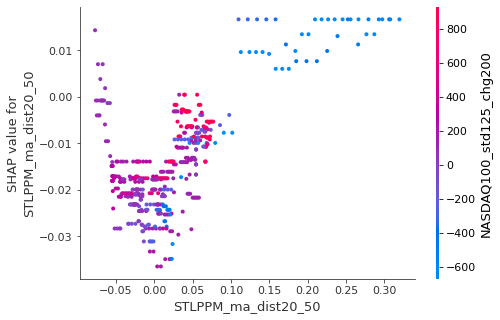

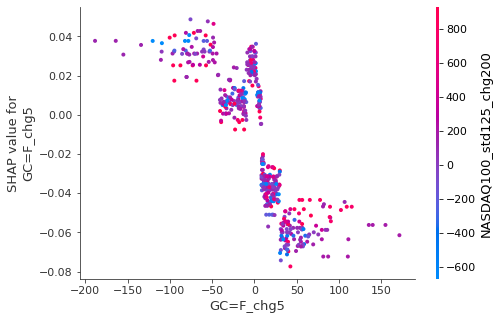

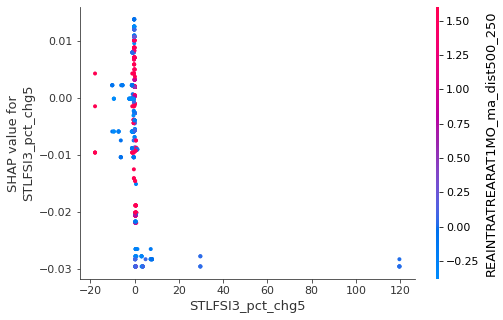

In [61]:
for iter_i, v in models_dict.items():
    if iter_i != 3:
        continue
    tree_model = v[0]
    explainer = shap.TreeExplainer(tree_model, num_iteration=tree_model.best_iteration)
    shap_values = explainer.shap_values(X_test)
    

    for name in X_test.columns[:5]:
        shap.dependence_plot(name, shap_values, X_test, )
    

In [62]:
shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values, X_test)
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_test.iloc[:100,:])

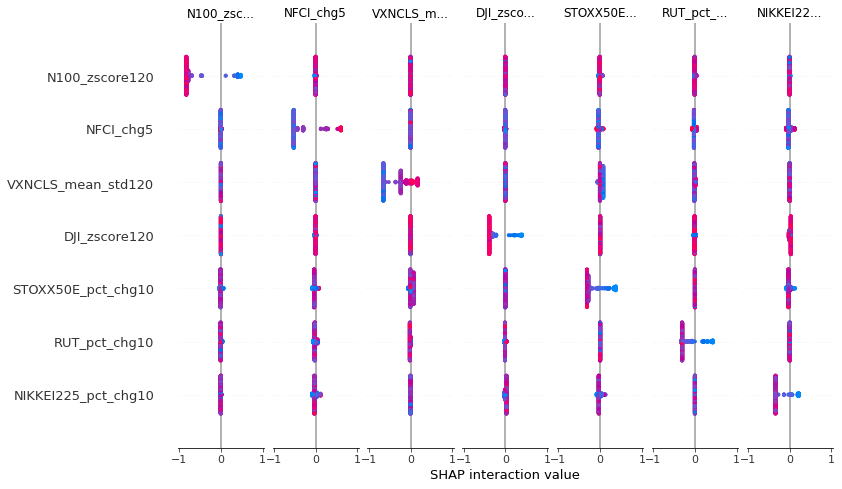

In [63]:
shap_interaction_values = shap.TreeExplainer(tree_model).shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values, X_test)

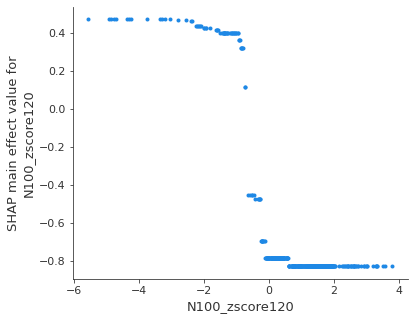

In [64]:
shap.dependence_plot(
    ('N100_zscore120', 'N100_zscore120'),
    shap_interaction_values, X_test,
    
)

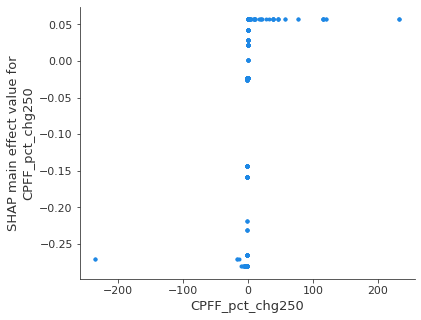

In [65]:
shap.dependence_plot(
    ('CPFF_pct_chg250', 'CPFF_pct_chg250'),
    shap_interaction_values, X_test
)

In [66]:

expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")



Explainer expected value: 1.8988820314407349


In [67]:
tp_sample = df_pred[(df_pred['target']==1) & (df_pred['pred_mean']>0.5)].index[0]
tn_sample = df_pred[(df_pred['target']==0) & (df_pred['pred_mean']<0.2)].index[0]
tp_sample, tn_sample

(Timestamp('2020-02-27 00:00:00'), Timestamp('2020-01-02 00:00:00'))

### True Positive Example: Model correctly predicted imminent crisis regime 

In [68]:
features = X_test.loc[X_test.index==tp_sample] #examine one date. this is a data frame
shap_values = explainer.shap_values(features)#shap values for the row
shap_interaction_values = explainer.shap_interaction_values(features)
    
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

In [69]:
dis = [f'{a} ({b:.03f})' for a, b in zip(features.columns, features.values[0].round(3))]
shap_bar = pd.DataFrame(data={'feat': dis, 'shap': shap_values[0]})

In [70]:
x_ = shap_bar['shap']
shap_bar['shap_z'] = (x_ - x_.mean())/x_.std()
shap_bar['colors'] = ['red' if x_ > 0 else 'green' for x_ in shap_bar['shap_z']]
shap_bar = shap_bar[shap_bar['shap_z'].abs()>0.4]
shap_bar.sort_values('shap_z', inplace=True, ascending=False)
shap_bar.reset_index(inplace=True)


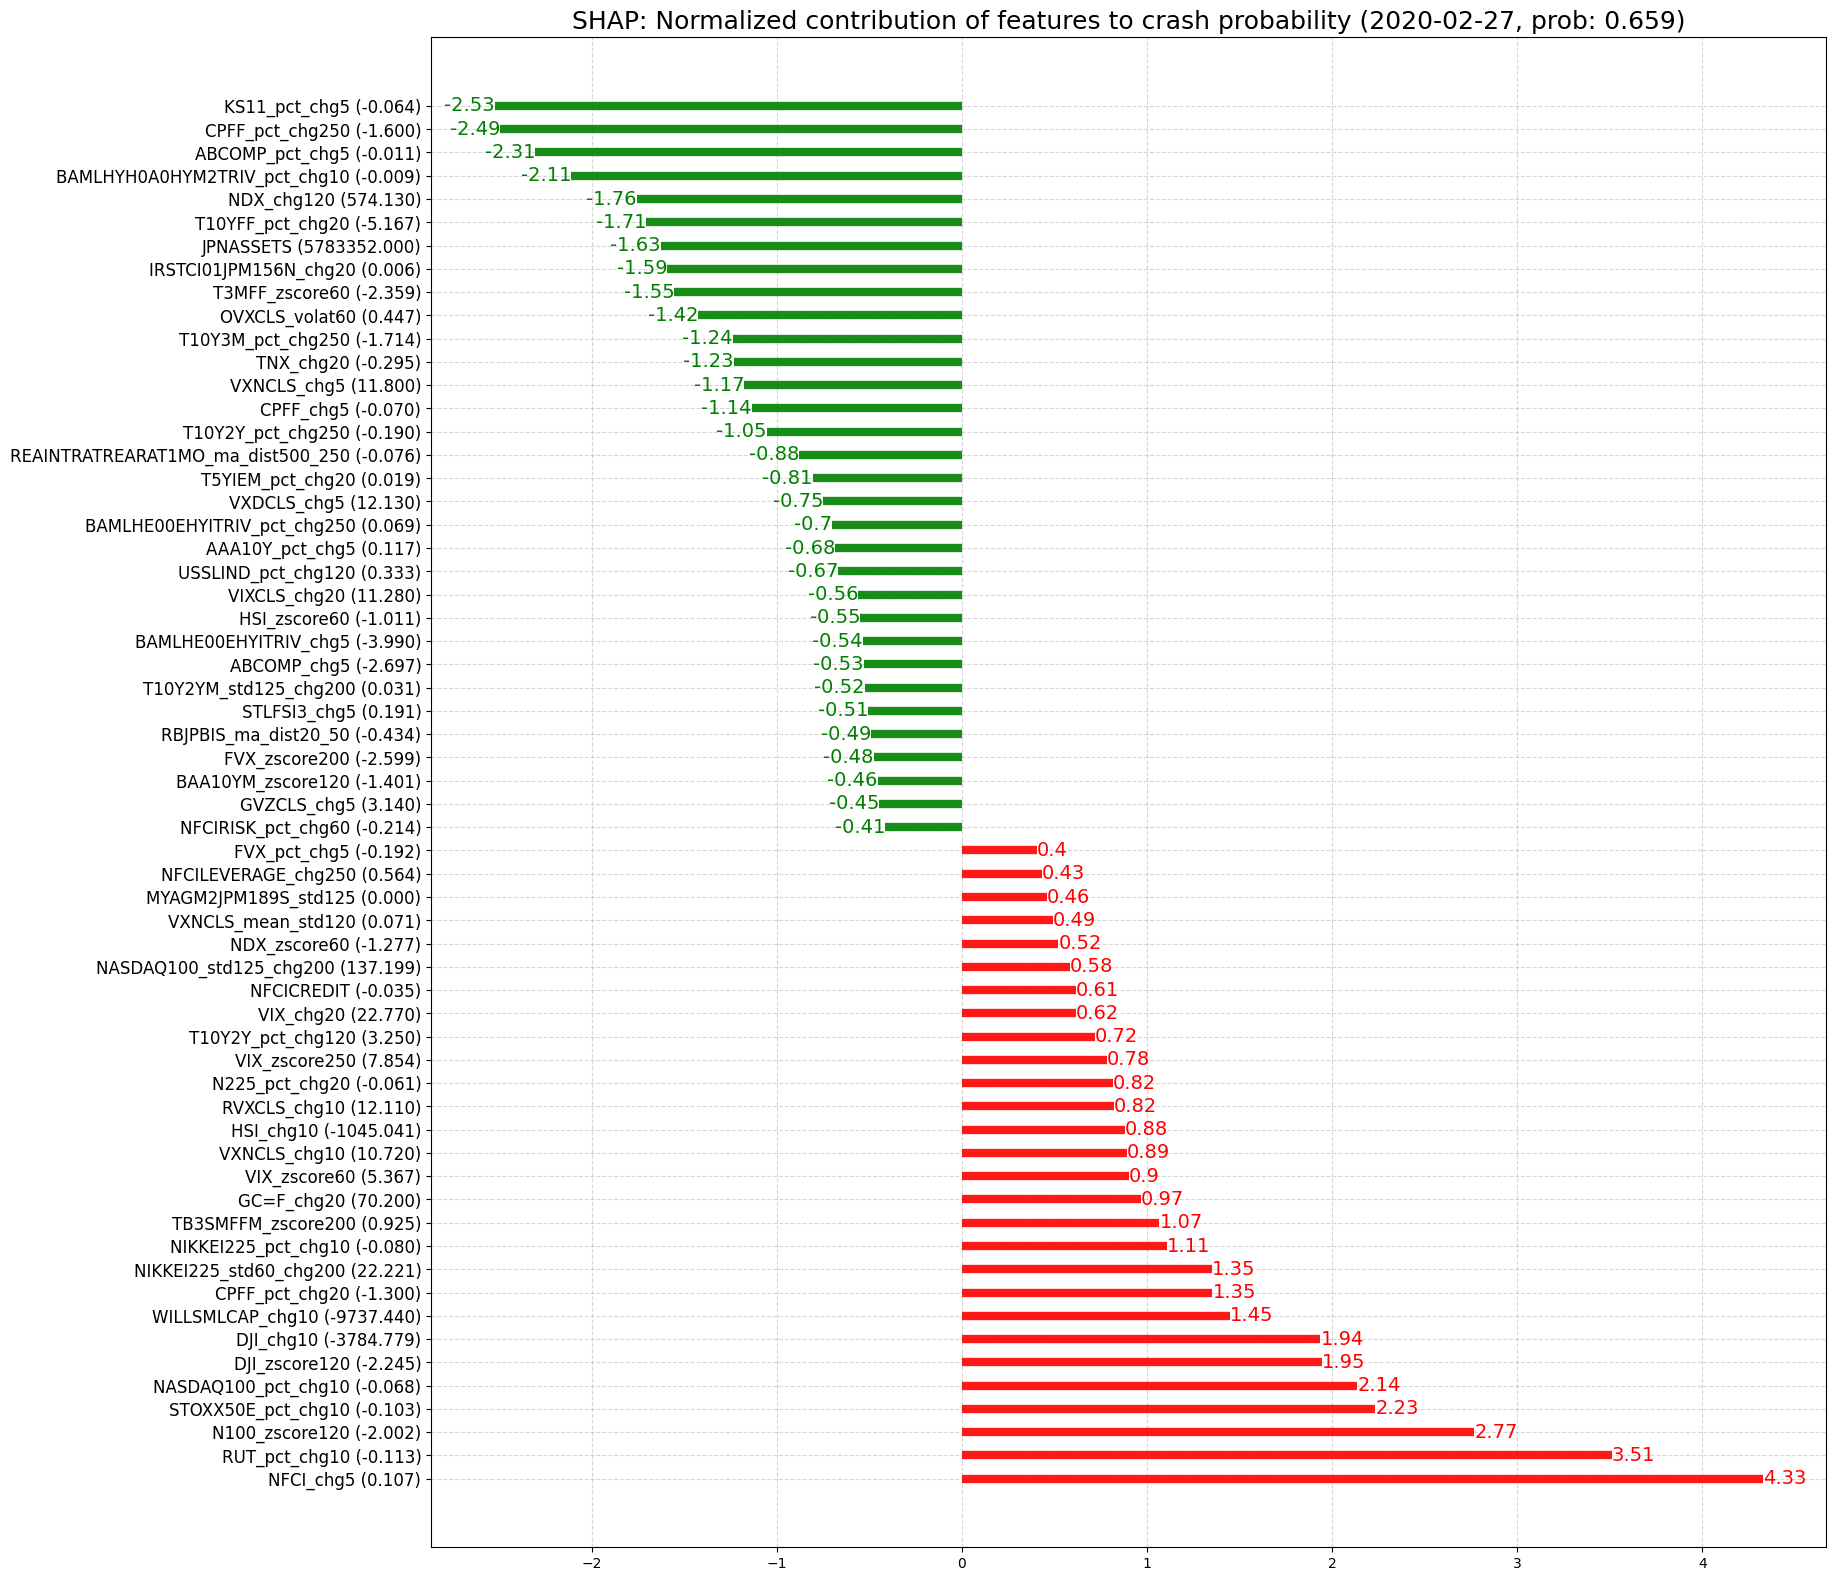

In [71]:
# Draw plot
plt.figure(figsize=(18,20), dpi= 100)
plt.hlines(y=shap_bar.index, xmin=0, xmax=shap_bar.shap_z, color=shap_bar.colors, alpha=0.9, linewidth=6)
for x, y, tex in zip(shap_bar.shap_z, shap_bar.index, shap_bar.shap_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x > 0 else 'green', 'size':14})

# Decorations
plt.yticks(shap_bar.index, shap_bar.feat, fontsize=12)
plt.title(f"SHAP: Normalized contribution of features to crash probability ({tp_sample.strftime('%Y-%m-%d')}, prob: {df_pred.loc[tp_sample]['pred_mean']:.03f})", 
          fontdict={'size':18})
plt.grid(linestyle='--', alpha=0.5)
# plt.xlim(-2.5, 2.5)
plt.show()


### True Negative Example: Model correctly predicted normal regime 

In [72]:
features = X_test.loc[X_test.index==tn_sample] #examine one date. this is a data frame
shap_values = explainer.shap_values(features) #shap values for the row
shap_interaction_values = explainer.shap_interaction_values(features)
    
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

In [73]:
dis = [f'{a} ({b:.03f})' for a, b in zip(features.columns, features.values[0].round(3))]
shap_bar = pd.DataFrame(data={'feat': dis, 'shap': shap_values[0]})

In [74]:
x_ = shap_bar['shap']
shap_bar['shap_z'] = (x_ - x_.mean())/x_.std()
shap_bar['colors'] = ['red' if x_ > 0 else 'green' for x_ in shap_bar['shap_z']]
shap_bar = shap_bar[shap_bar['shap_z'].abs()>0.4]
shap_bar.sort_values('shap_z', inplace=True, ascending=False)
shap_bar.reset_index(inplace=True)


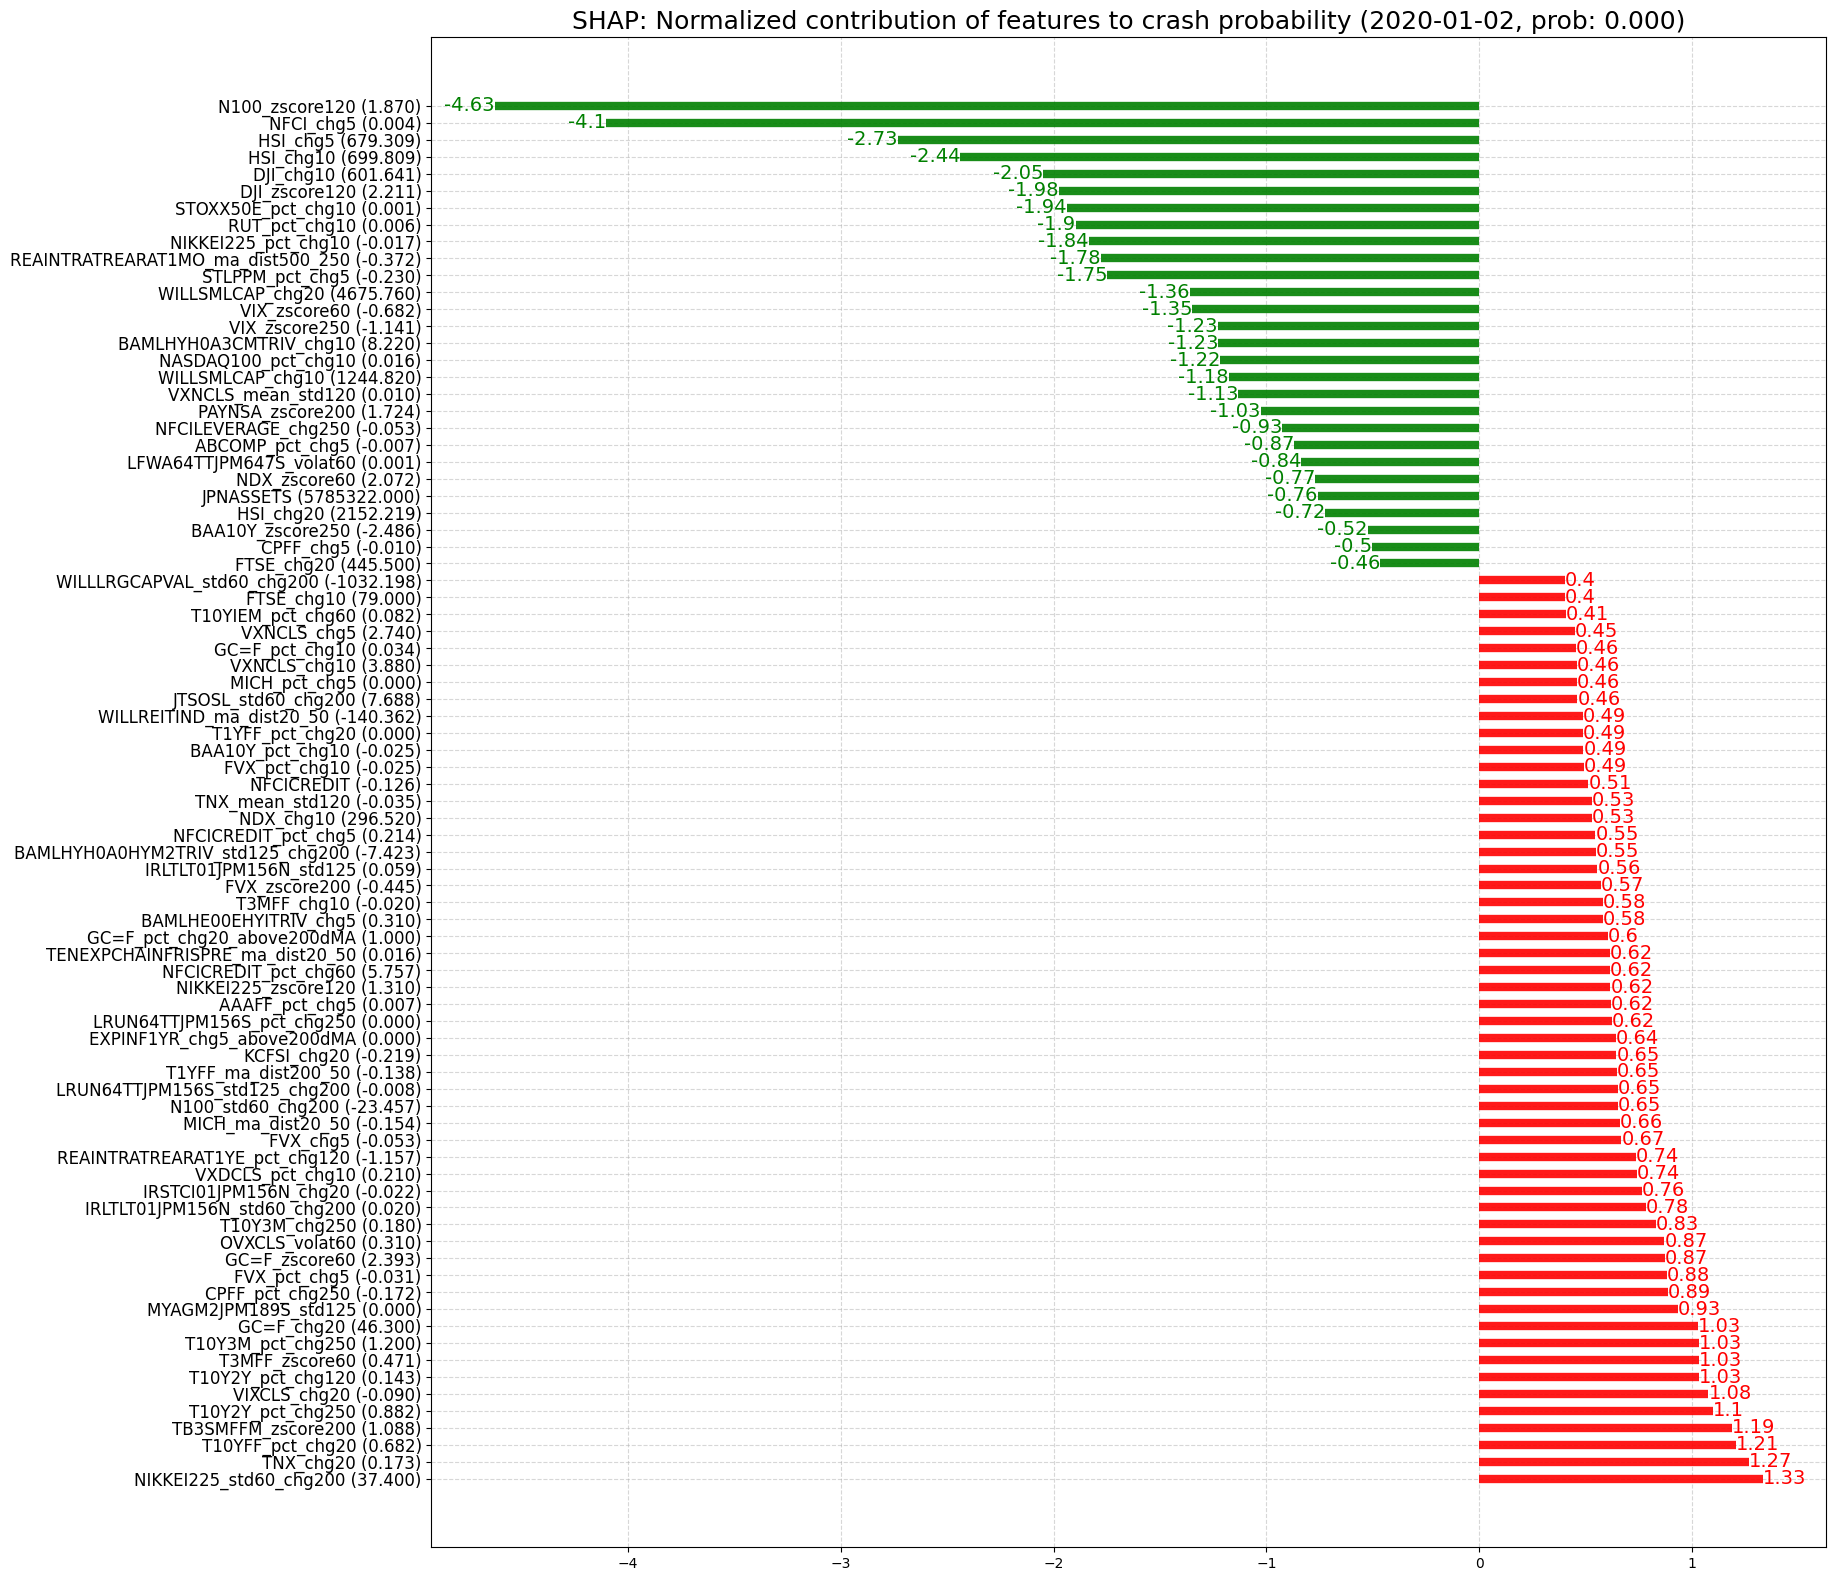

In [75]:
# Draw plot
plt.figure(figsize=(18,20), dpi= 100)
plt.hlines(y=shap_bar.index, xmin=0, xmax=shap_bar.shap_z, color=shap_bar.colors, alpha=0.9, linewidth=6)
for x, y, tex in zip(shap_bar.shap_z, shap_bar.index, shap_bar.shap_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left',
                 verticalalignment='center', fontdict={'color':'red' if x > 0 else 'green', 'size':14})

# Decorations
plt.yticks(shap_bar.index, shap_bar.feat, fontsize=12)
plt.title(f"SHAP: Normalized contribution of features to crash probability ({tn_sample.strftime('%Y-%m-%d')}, prob: {df_pred.loc[tn_sample]['pred_mean']:.03f})", 
          fontdict={'size':18})
plt.grid(linestyle='--', alpha=0.5)
# plt.xlim(-2.5, 2.5)
plt.show()


### Visualize the trees in XGBoost Models

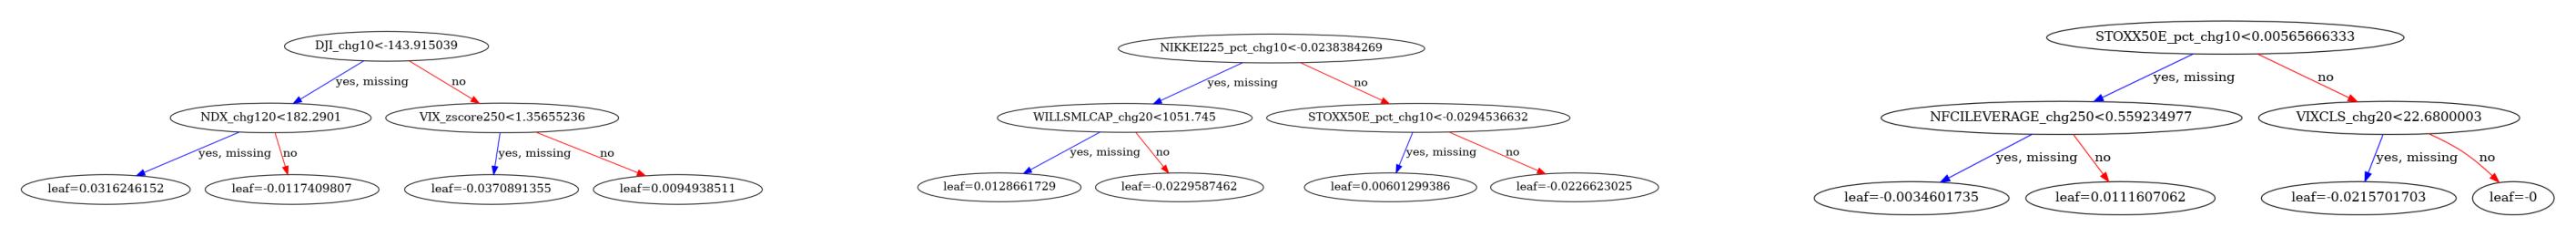

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(18, 9), dpi=200)
xgb.plot_tree(tree_model, num_trees=1, ax=axs[0])
xgb.plot_tree(tree_model, num_trees=100, ax=axs[1])
xgb.plot_tree(tree_model, num_trees=200, ax=axs[2])
# plt.gcf().set_size_inches(18.5, 10.5)
plt.show()